In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import re

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
#Reading data files
col_df = pd.read_csv('columns_description.csv',encoding="ISO-8859-1")
prev_df = pd.read_csv('previous_application.csv',encoding="ISO-8859-1")
curr_df = pd.read_csv('application_data.csv',encoding="ISO-8859-1")

In [4]:
curr_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
curr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#Removing the columns which has 50% or more rows valus as NaN
#print (round (curr_df.isnull().mean() * 100)
df = curr_df.loc[:, curr_df.isnull().mean() <= .5]
df2 = df.copy()
#df.info()

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [8]:
#Create a new function:
def num_missing(x):
  return (x.isnull().mean()*100)

#print ("Missing values per column:")
#print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

In [9]:
df2.apply(num_missing)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [10]:
def Plot_BarGraph(ColumnName, row, col):
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [row, col]
    ax = sns.countplot(x=ColumnName, hue="TARGET", data=df2)
    plt.setp(ax.get_xticklabels(), rotation = 0)
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        percent = ((height)/(len(df2))) * 100
        ax.text(p.get_x()+p.get_width()/2., height + 0.5,'%.1f' % percent + "%", ha = "center", va = "bottom", fontsize = 15)

    plt.show()

<Axes.ArtistList of 36 patches>

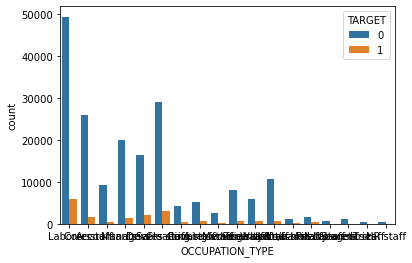

In [11]:
# testing the function
ax = sns.countplot(x='OCCUPATION_TYPE', hue="TARGET", data=df2)
ax.patches

In [12]:
df3 = df2.loc[df2.TARGET == 1, :]

In [13]:
def Plot_BarGraph_LimitedColumns(ColumnName, row, col):
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [row, col]
    ax = sns.countplot(x=ColumnName, hue="TARGET", data=df2)
#     ax = sns.countplot(x=ColumnName, data=df3)


    #ax = sns.countplot(x=ColumnName, hue="TARGET", data=df, order=temp_df[ColumnName].value_counts().iloc[:10].index)
    plt.setp(ax.get_xticklabels(), rotation =90)
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        percent = ((height)/(len(df2))) * 100
        ax.text(p.get_x()+p.get_width()/2., height + 0.5,'%.1f' % percent + "%", ha = "center", va = "bottom", fontsize = 15)

    plt.show()
plt.subplots_adjust(hspace=1)

<Figure size 432x288 with 0 Axes>

In [14]:
#OCCUPATION_TYPE  has 31.0% NaN values.
#However after analysing, we can replace NAME_INCOME_TYPE column which has Pensioner and Commercial Associate values 
#in it for the NaN values of OCCUPATION_TYPE

#print(df.loc[df['OCCUPATION_TYPE'].isnull()])
#df['OCCUPATION_TYPE']= np.where(df['OCCUPATION_TYPE'].isnull(), df['NAME_INCOME_TYPE'], df['OCCUPATION_TYPE'])

df2.loc[df['OCCUPATION_TYPE'].isna(),'OCCUPATION_TYPE'] = df2['NAME_INCOME_TYPE']



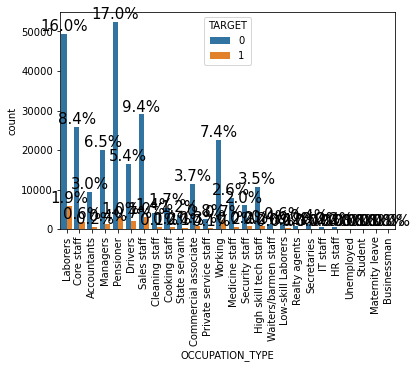

In [15]:
Plot_BarGraph_LimitedColumns( df2['OCCUPATION_TYPE'], 24, 10)

In [16]:
df2.OCCUPATION_TYPE.value_counts(normalize=True)

Pensioner                0.180016
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Working                  0.081038
Managers                 0.069497
Drivers                  0.060495
Commercial associate     0.039989
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
State servant            0.012315
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Unemployed               0.000072
Student                  0.000016
Businessman              0.000007
Maternity leave          0.000003
Name: OCCUPATION_TYPE, dtype: float64

In [17]:
# As we can see there is high probability of Labourers, Core Staff, Pensioners, Drivers, Sales Staff types of OCCUPATION_TYPE
# to become loan defaulters comared to State Servants, Accountants, Managers, Cleaning Staff, Cooking Staff, Private Service Staff


In [18]:
#AMT_INCOME_TOTAL - creating bins of income categories [0, 1000, 10000, 50000, 100000, 500000, 1000000, 2000000, 50000000, 10000000]

bins = [0, 10000, 50000, 100000, 200000, 300000, 500000, 1000000, 2000000, 5000000, 10000000, np.inf]
labels = [ '10K', '50K', '1 Lakh', '2 Lakh', '3 Lakh', '5 Lakh', '10 Lakh', '20 Lakh', '50 Lakh', '1Cr.', '1Cr.+']
df2['INCOME_Range'] = pd.cut(df2['AMT_INCOME_TOTAL'], bins, labels=labels)
#print(df2[['AMT_INCOME_TOTAL','INCOME_Range']]) 
#print (pd.value_counts(df2["INCOME_Range"], sort=False))

<AxesSubplot:xlabel='index', ylabel='AMT_INCOME_TOTAL'>

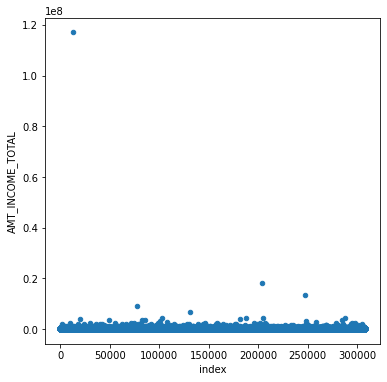

In [19]:
# Outliers in the Dataset are the with income range of more than 10000000 - 1CR. and 1cr+
#print(df2.loc[(df2["INCOME_Range"] == '1Cr.') |(df2["INCOME_Range"] == '1Cr.+')] )
df2.reset_index()
plt.rcParams["figure.figsize"] = [6, 6]
df2.reset_index().plot(kind='scatter', x='index', y='AMT_INCOME_TOTAL')


In [20]:
print(df2.loc[(df2["AMT_INCOME_TOTAL"] > 10000000) ] )

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary 

# Outliers for AMT_INCOME_TOTAL is above 1Cr. There are only 3 people with more than 1 Cr. income from data of 3 Lakh people.
# Hence these 3 record can be considered as outliers.

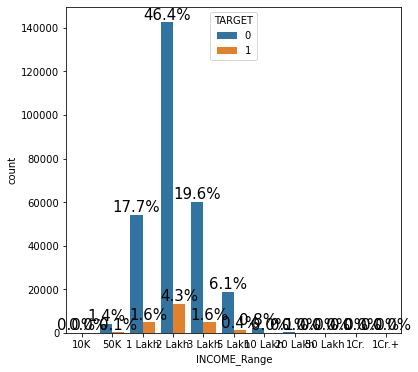

In [21]:
Plot_BarGraph( df2['INCOME_Range'], 24, 8)

In [22]:
# As we can observer from the above PLot for IncomeRange, there is more probablity of Loan deafulter between income of 1 Lakh to 3 Lakh. 
#However income of 2 lakh has more probability of getting loan and more % for loan defauter.

In [23]:
#DAYS_BIRTH - creating bins of income categories ['0-18', '18-35', '35-45','45-60','60-70' , '70+']
df2['Age'] = round(  ((df2['DAYS_BIRTH'])/-365), 0)
#print(df2['Age'])
bins = [0,  18, 35, 45, 55, 65, np.inf]
names = ['0-18', '18-35', '35-45','45-55','55-65' , '65+']
df2['AgeRange'] = pd.cut(df2['Age'], bins, labels=names)
print (pd.value_counts(df2["AgeRange"], sort=False))

0-18         0
18-35    88342
35-45    83882
45-55    69834
55-65    59010
65+       6443
Name: AgeRange, dtype: int64


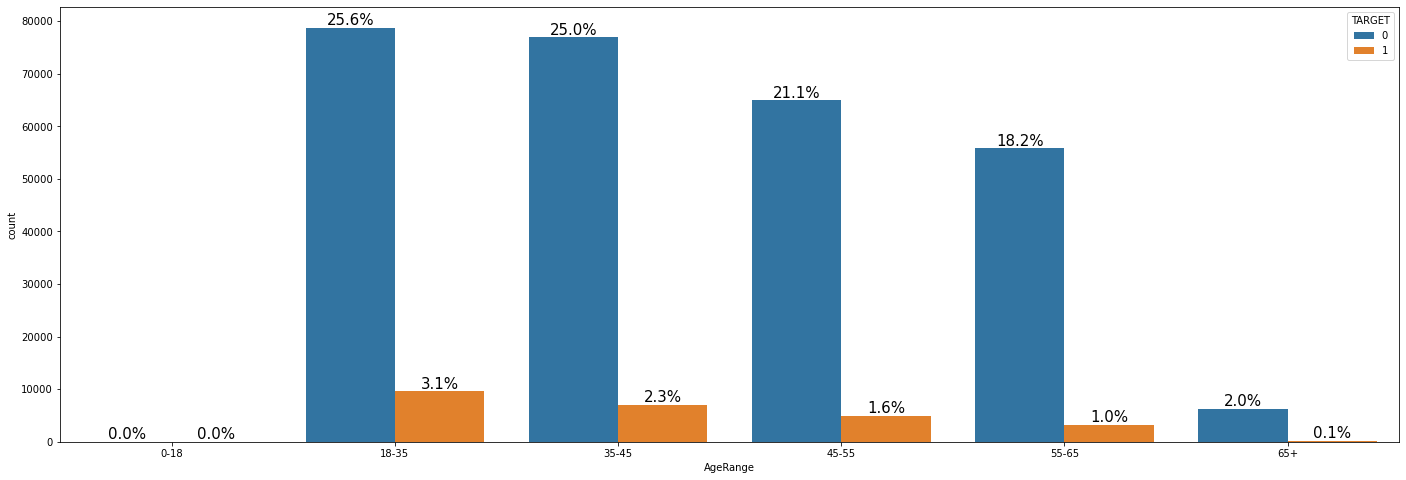

In [24]:
Plot_BarGraph( df2['AgeRange'], 16, 8)


In [25]:
# From above plot of Age (at the time of loan application), we can observe that People with less than 55 age have more 
#probabity of loan defaulter and people above 65 age have very less probability of Loan Defaulter.

In [26]:

#DAYS_LAST_PHONE_CHANGE    - creating bins of income categories ['0-18', '18-35', '35-45','45-60','60-70' , '70+']
#print (sum(df2['DAYS_LAST_PHONE_CHANGE'].isnull()))
df2['Months_LAST_PHONE_CHANGE'] = round(  ((df2['DAYS_LAST_PHONE_CHANGE'])/-30), 0)
#print(df2['Months_LAST_PHONE_CHANGE'])
bins1 = [0, 1, 2, 3, 5, 8, 12, 24, 48, np.inf]
months = ['0 Days', '1-2 Months', '2-3 Months','3-5 Months','5-8 Months', '8-12 Months', '1-2 Years', '2-4 Years', '4 Years+']
df2['LAST_PHONE_CHANGE_Range'] = pd.cut(df2['Months_LAST_PHONE_CHANGE'], bins1, labels=months)
print (pd.value_counts(df2["LAST_PHONE_CHANGE_Range"], sort=False))


0 Days          2970
1-2 Months      2037
2-3 Months      1897
3-5 Months      5793
5-8 Months     12074
8-12 Months    20349
1-2 Years      56676
2-4 Years      66642
4 Years+       89902
Name: LAST_PHONE_CHANGE_Range, dtype: int64


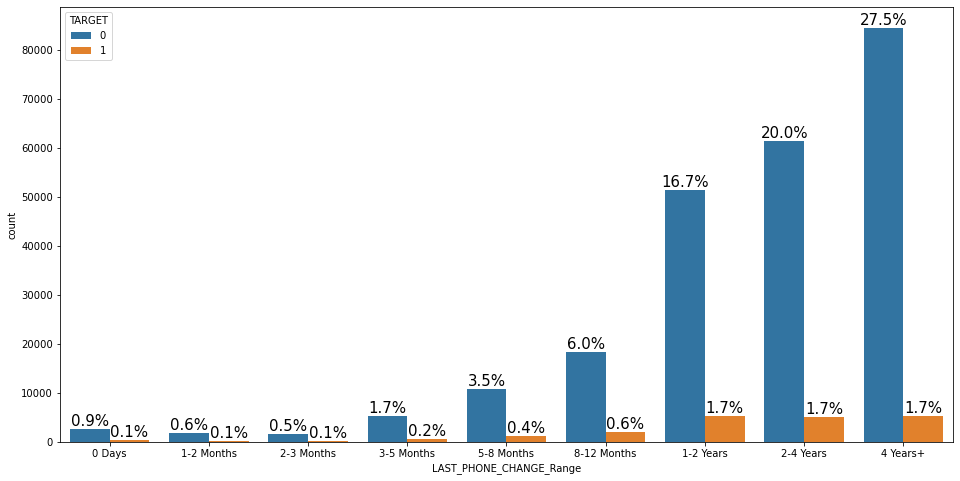

In [27]:
Plot_BarGraph( df2['LAST_PHONE_CHANGE_Range'], 20, 12)


In [28]:
# From above plot of People with changes phone number duration range, it is difficult to predict the pattern. 
# There is very less % of people who got the loan who has changed thier phone number in last 6 month. 
# Also there is no significant difference for the people who have changed thier phone number few years back.
# Hence this LAST_PHONE_CHANGE will not be used for analysis.

In [29]:
#AMT_CREDIT - creating bins of AMT_CREDIT categories [0, 1000, 10000, 50000, 100000, 500000, 1000000, 2000000, 50000000, 10000000]

bins = [0, 10000, 50000, 100000, 200000, 300000, 500000, 1000000, 2000000, 5000000, 10000000, np.inf]
labels = [ 'Up to 10K', '10-50K', '50K-1 Lakh', '1-2 Lakh', '2-3 Lakh', '3-5 Lakh', '5-10 Lakh', '10-20 Lakh', '20-50 Lakh', '1Cr.', '1Cr.+']
df2['AMT_CREDIT_Range'] = pd.cut(df2['AMT_CREDIT'], bins, labels=labels)
print (pd.value_counts(df2['AMT_CREDIT_Range'], sort=False))


Up to 10K          0
10-50K           561
50K-1 Lakh      5443
1-2 Lakh       30140
2-3 Lakh       54813
3-5 Lakh       58376
5-10 Lakh     108193
10-20 Lakh     47956
20-50 Lakh      2029
1Cr.               0
1Cr.+              0
Name: AMT_CREDIT_Range, dtype: int64


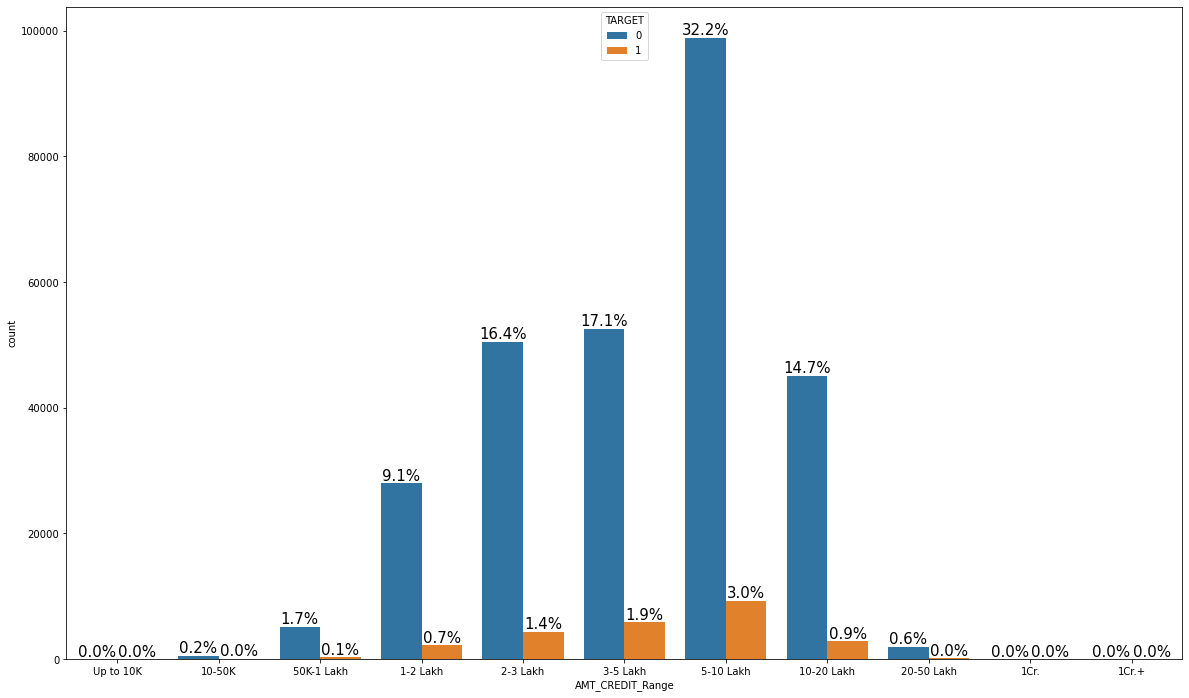

In [30]:
Plot_BarGraph( df2['AMT_CREDIT_Range'], 24, 12)

In [31]:
# As we can for AMT_CREDIT, there is more chances of loan dfaulter with credit/loan of 5-10 laks compared to other loan.

In [32]:


#ORGANIZATION_TYPE
# for ease of looking into the graphs. Since there are lot of Trade, Industry types, Transport and Buiness Entity, 
# we are making then into single type for ease of looking inyo the graph. 
# Converting all Trade: types into Trade  
# Converting all Industry: type into Industry  
# Converting all Transport: type into Transport

df2.loc[df['ORGANIZATION_TYPE'].str.contains("Trade"),'ORGANIZATION_TYPE'] = "Trade"
df2.loc[df['ORGANIZATION_TYPE'].str.contains("Industry"),'ORGANIZATION_TYPE'] = "Industry"
df2.loc[df['ORGANIZATION_TYPE'].str.contains("Transport"),'ORGANIZATION_TYPE'] = "Transport"
df2.loc[df['ORGANIZATION_TYPE'].str.contains("Business Entity Type"),'ORGANIZATION_TYPE'] = "Business Entity"

print (pd.value_counts(df2["ORGANIZATION_TYPE"], sort=True))

Business Entity        84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

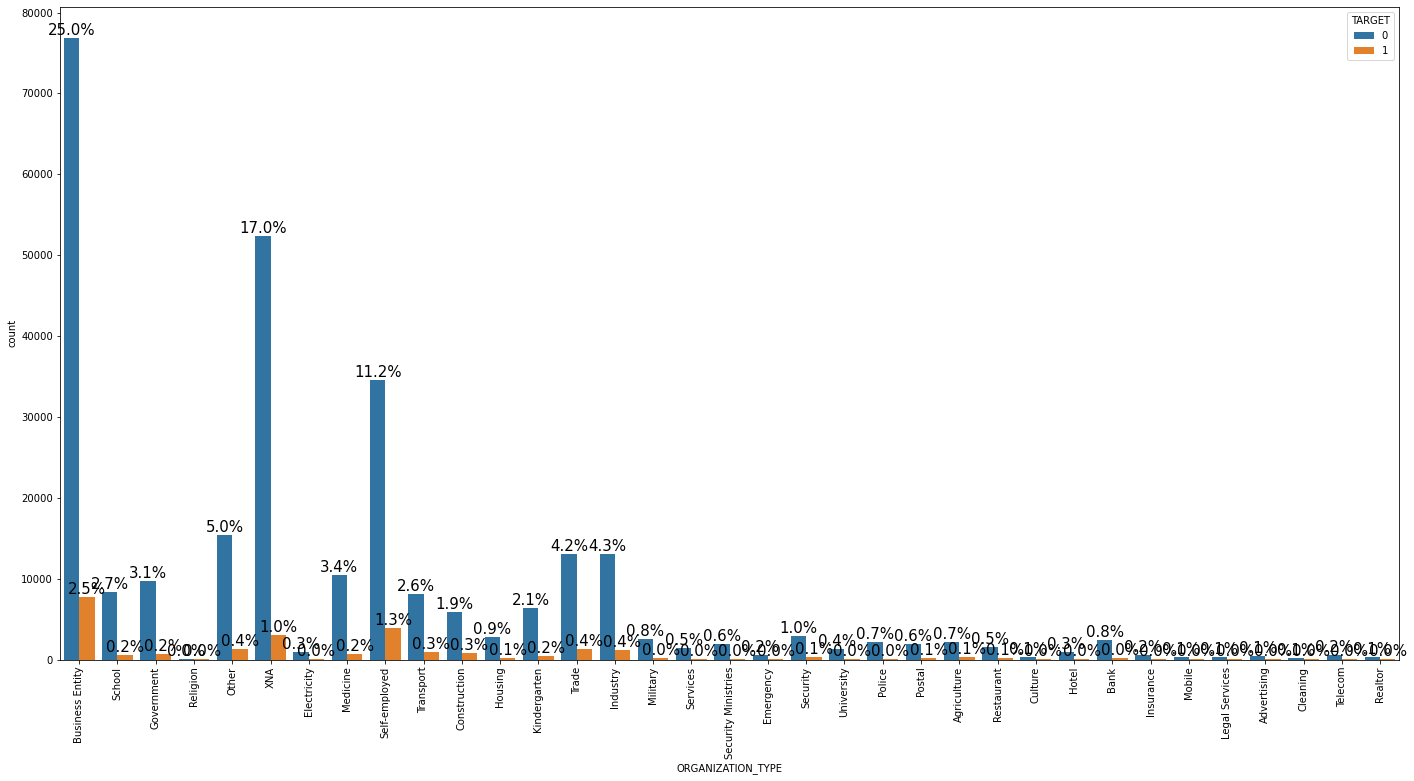

In [33]:
Plot_BarGraph_LimitedColumns(df2['ORGANIZATION_TYPE'], 30, 12)

In [34]:
# As we can see from the graph of ORGANIZATION_TYPE: XNA, Business Entity and Self employed have high probability for loan defaulters


In [35]:
#AMT_ANNUITY - need to create categories/bins

bins = [0, 3000, 5000, 8000, 10000, 15000, 20000, 25000, 30000, 40000, 60000, 100000, 300000, np.inf]
labels = [ 'upto 3K', '3K-5K', '5K-8K', '8K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-40K', '40K-60K','60K-1Lakh', '1-3Lakh', '3 Lakh+']
df2['AMT_ANNUITY_Range'] = pd.cut(df2['AMT_ANNUITY'], bins, labels=labels)

print (pd.value_counts(df2["AMT_ANNUITY_Range"], sort=True))

30K-40K      58562
20K-25K      48362
25K-30K      44104
15K-20K      42825
40K-60K      41834
10K-15K      40397
8K-10K       13293
5K-8K         8849
60K-1Lakh     7627
3K-5K         1077
1-3Lakh        505
upto 3K         64
3 Lakh+          0
Name: AMT_ANNUITY_Range, dtype: int64


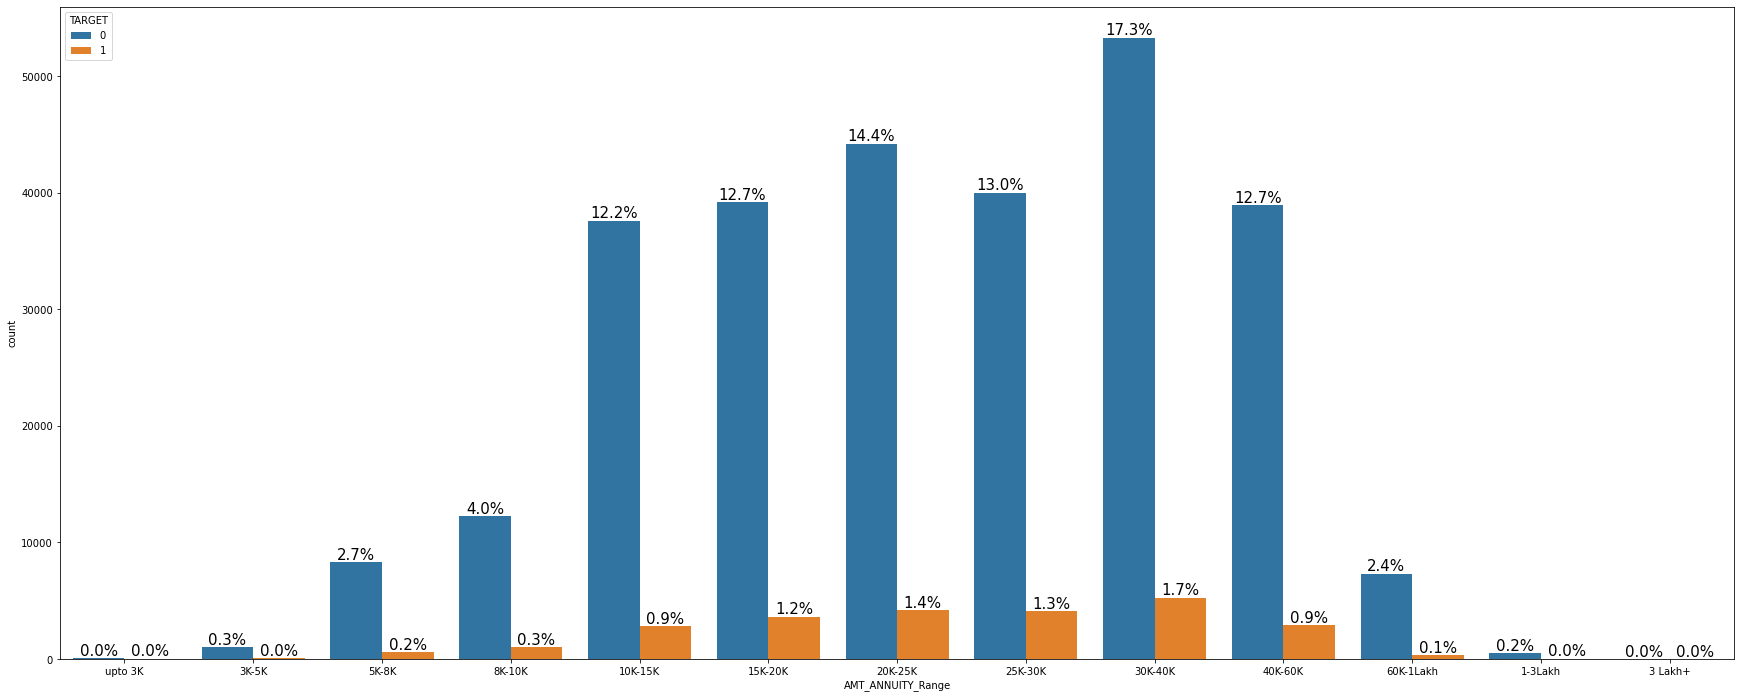

In [36]:
Plot_BarGraph( df2['AMT_ANNUITY_Range'], 24, 12)


In [37]:
# AMT_ANNUITY_Range
# As we can observer from the plot of AMT_ANNUITY_Range, the probability of Loan defaulters 
# is high for the AMT_ANNUITY
# between INR 15000 to 40000 compared to other AMT_ANNUITY.

In [38]:
#DAYS_ID_PUBLISH - creating bins of DAYS_ID_PUBLISH - Registration ID changed ['0-18', '18-35', '35-45','45-60','60-70' , '70+']

df2['IDChanged'] = round(  ((df2['DAYS_ID_PUBLISH'])/-30), 0)
bins1 = [0, 1, 2, 3, 5, 8, 12, 24, 36, 60, 120, np.inf]
months = ['0-1 Day', '1day-1 Month', '1-2 Months', '2-5 Months','5-8 Months','8-12 Months', '1-2 Years', '2-3 Years', '3-5 Years', '5-10 Years', '10 Years+']
df2['IDChanged_Range'] = pd.cut(df2['IDChanged'], bins1, labels=months)

print (pd.value_counts(df2["IDChanged_Range"], sort=False))
#print (pd.value_counts(df2["DAYS_ID_PUBLISH"], sort=True))

0-1 Day           1366
1day-1 Month      1308
1-2 Months        1161
2-5 Months        2287
5-8 Months        3391
8-12 Months       4858
1-2 Years        15647
2-3 Years        17136
3-5 Years        33179
5-10 Years       91558
10 Years+       134589
Name: IDChanged_Range, dtype: int64


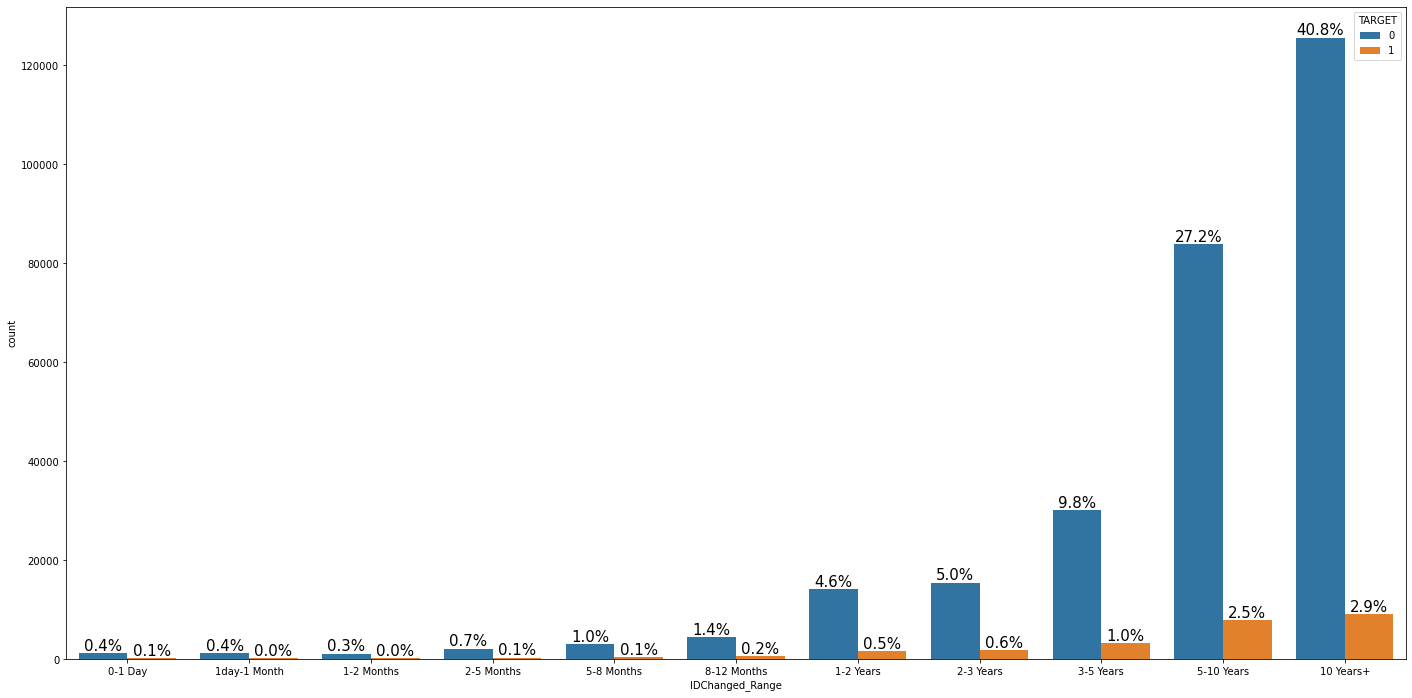

In [39]:
Plot_BarGraph( df2['IDChanged_Range'], 24, 12)

In [40]:
# From above plot of People with changes in identity document duration range, We can observe that 
# There is very less % of people who got the loan who has changed their identity document in last 6 month.
# Hence we can not state that people who have changed the ID recently will be defaulter or not.
# Also there is higher probability of people on loan defaulter who has changed their identity document
# however it is not very high which can help us to identify there is possibility of lon defaulter who have changed their ID before 5 years+
# Therefore we can not predict the Loan Defaulter probability based of identity document changed duration.

In [41]:
#DAYS_REGISTRATION - creating bins of  ['0-18', '18-35', '35-45','45-60','60-70' , '70+']

df2['DAYS_REGISTRATION'] = round(  ((df2['DAYS_REGISTRATION'])/-30), 0)
bins1 = [0, 1, 2, 3, 5, 8, 12, 24, 36, 60, 120, np.inf]
months = ['0-1 Day', '1day-1 Month', '1-2 Months', '2-5 Months','5-8 Months','8-12 Months', '1-2 Years', '2-3 Years', '3-5 Years', '5-10 Years', '10 Years+']
df2['REGISTRATION_Changed_Range'] = pd.cut(df2['DAYS_REGISTRATION'], bins1, labels=months)

print (pd.value_counts(df2["REGISTRATION_Changed_Range"], sort=False))

0-1 Day           1515
1day-1 Month      1457
1-2 Months        1294
2-5 Months        2704
5-8 Months        3859
8-12 Months       5240
1-2 Years        15315
2-3 Years        14781
3-5 Years        23827
5-10 Years       53911
10 Years+       182309
Name: REGISTRATION_Changed_Range, dtype: int64


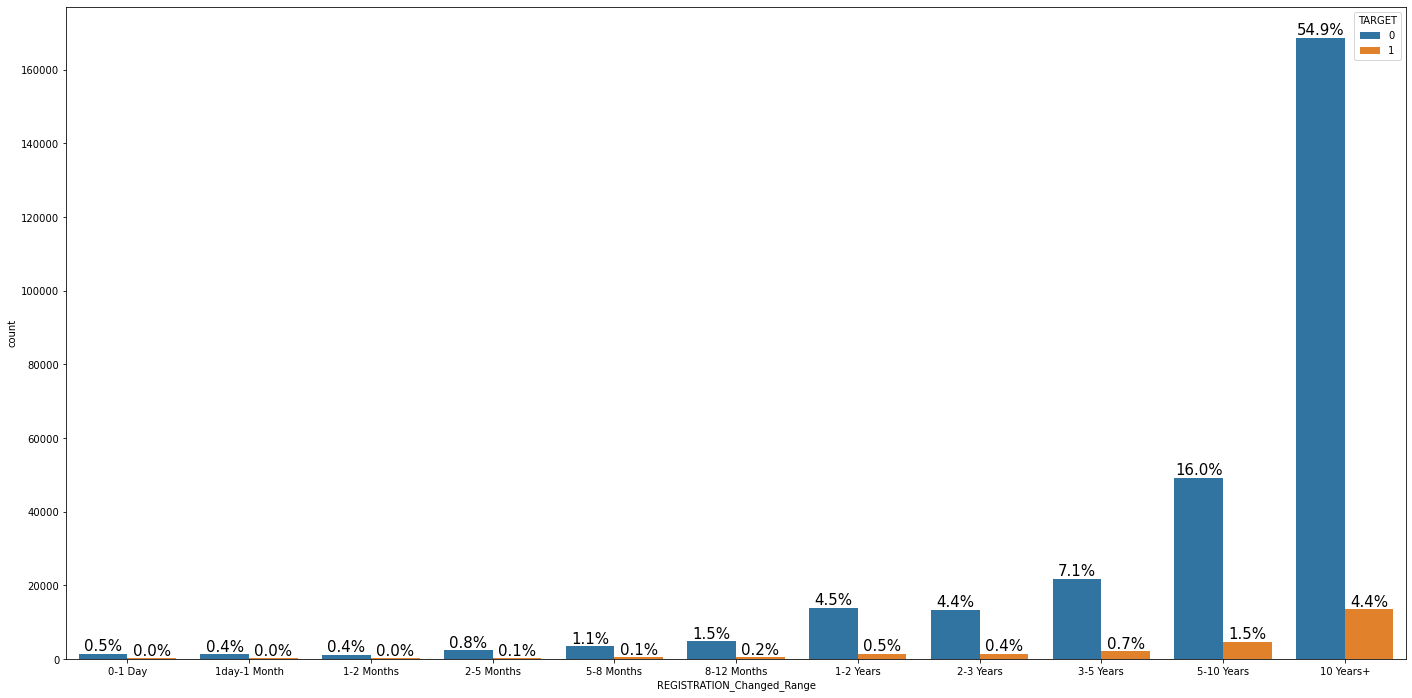

In [42]:
Plot_BarGraph( df2['REGISTRATION_Changed_Range'], 24, 12)

In [43]:
# From above plot of People with changes in REGISTRATION duration range, We can observe that 
# There is very less % of people who got the loan who has changed their REGISTRATION in last 6 month.
# Hence we can not state that people who have changed the ID recently will be defaulter or not.
# Also there is higher probability of people on loan defaulter who has changed their REGISTRATION,
# however it is not very high which can help us to identify there is possibility of lon defaulter who have changed their REGISTRATION before 5 years+
# Therefore we can not predict the Loan Defaulter probability based of REGISTRATION changed duration.

In [44]:
#DAYS_EMPLOYED - creating bins of income categories ['0-18', '18-35', '35-45','45-60','60-70' , '70+']

df2['DAYS_EMPLOYED'] = round(  ((df2['DAYS_EMPLOYED'])/-30), 0)
bins1 = [0, 1, 2, 3, 5, 8, 12, 24, 36, 60, 120, np.inf]
months = ['0-1 Day', '1day-1 Month', '1-2 Months', '2-5 Months','5-8 Months','8-12 Months', '1-2 Years', '2-3 Years', '3-5 Years', '5-10 Years', '10 Years+']
df2['DAYS_EMPLOYED_Range'] = pd.cut(df2['DAYS_EMPLOYED'], bins1, labels=months)

print (pd.value_counts(df2["DAYS_EMPLOYED_Range"], sort=False))

0-1 Day           141
1day-1 Month      322
1-2 Months       1388
2-5 Months       6095
5-8 Months      10383
8-12 Months     10588
1-2 Years       31312
2-3 Years       29183
3-5 Years       46338
5-10 Years      64536
10 Years+       51809
Name: DAYS_EMPLOYED_Range, dtype: int64


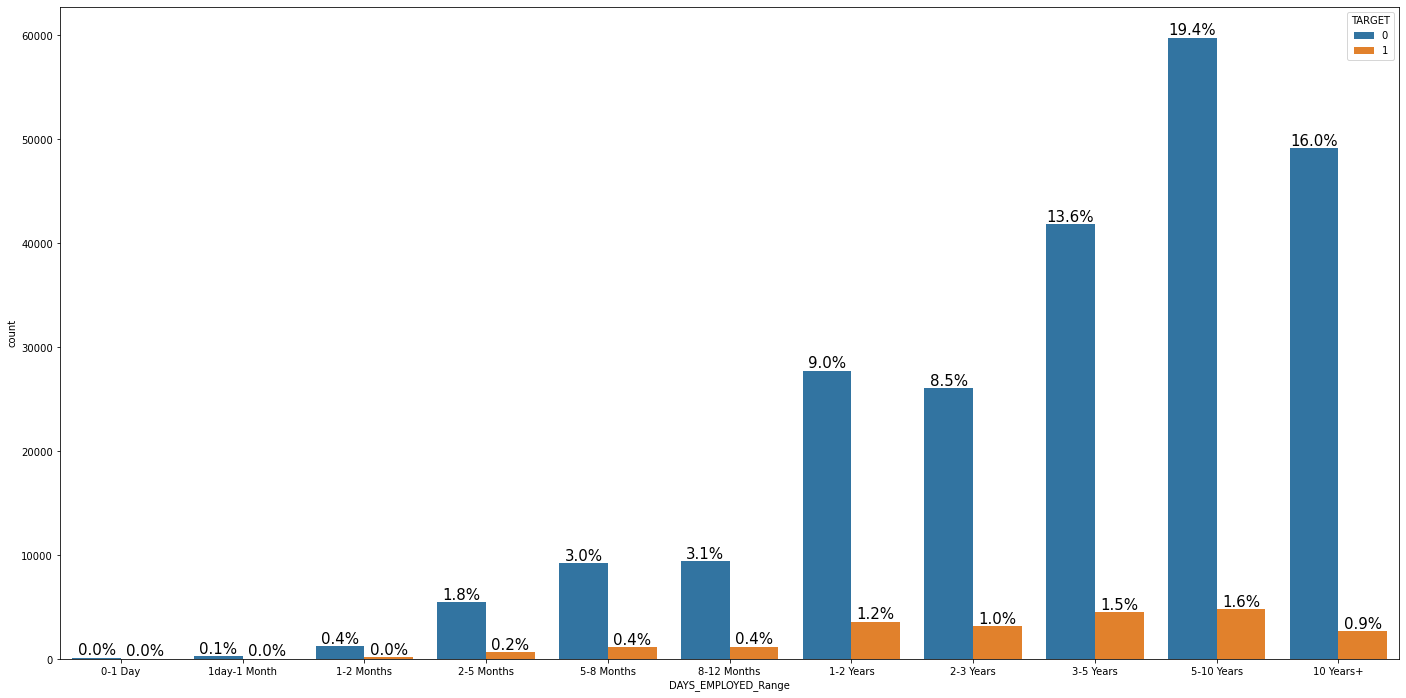

In [45]:
Plot_BarGraph( df2['DAYS_EMPLOYED_Range'], 24, 12)

In [46]:
# From above plot of People with changes in REGISTRATION duration range, We can observe that 
# There is very less % of people who got the loan who has less number of days as employed.
# Hence we can not state that people who have changed the ID recently will be defaulter or not.
# Also there is higher probability of people on loan defaulter who has been in job/employment for more than 1 year,
# however it is not very high which can help us to identify there is possibility of lon defaulter who have job for more than  1 years+
# Therefore we can not predict the Loan Defaulter probability based of job/employment days duration.

In [47]:
#REGION_POPULATION_RELATIVE - creating bins
# Normalized population of region where client lives (higher number means the client lives in more populated region)
df2['REGION_POPULATION_RELATIVE'] = round(  (df2['REGION_POPULATION_RELATIVE']), 3)
bins1 = [0.000, 0.010, 0.020, 0.030, 0.70, 1]
population_density = ['Negligible Density of Population', 'Low Density of Population', 'Low-Medium Density of Population', 'Medium Density of Population','High Density of Population']
df2['POPULATION_Density_Range'] = pd.cut(df2['REGION_POPULATION_RELATIVE'], bins1, labels=population_density)

print (pd.value_counts(df2["POPULATION_Density_Range"], sort=True))

Negligible Density of Population    90052
Low Density of Population           89147
Medium Density of Population        68382
Low-Medium Density of Population    59928
High Density of Population              0
Name: POPULATION_Density_Range, dtype: int64


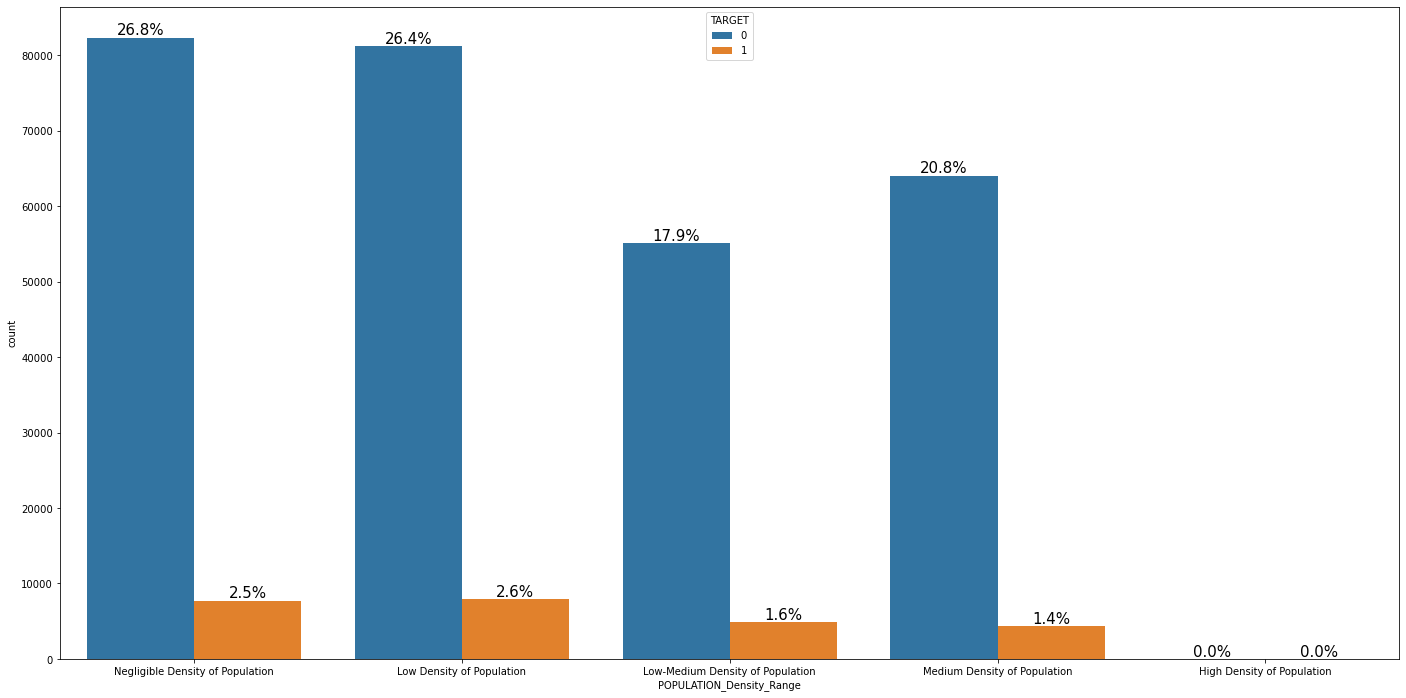

In [48]:
Plot_BarGraph( df2['POPULATION_Density_Range'], 24, 8)

In [49]:
#POPULATION_Density_Range
#Here we can predict that people who stay in negligible and low  density of population, 
# there is more probability of loan defaulters compared.

In [50]:
#AMT_GOODS_PRICE

bins = [0, 50000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000, 5000000,  np.inf]
labels = [ 'upto 50K', '50K-1 Lakh', '1-2 Lakh', '2-3 Lakh', '3-5 Lakh', '5-8 Lakh', '8-10 Lakh', '10-15 Lakh', '15-20 Lakh', '20-50 Lakh', '50 Lakh+']
df2['AMT_GOODS_PRICE_Range'] = pd.cut(df2['AMT_GOODS_PRICE'], bins, labels=labels)

print (pd.value_counts(df2["AMT_GOODS_PRICE_Range"], sort=False))


upto 50K       1327
50K-1 Lakh     7382
1-2 Lakh      32956
2-3 Lakh      62761
3-5 Lakh      78192
5-8 Lakh      61251
8-10 Lakh     29245
10-15 Lakh    27205
15-20 Lakh     5821
20-50 Lakh     1093
50 Lakh+          0
Name: AMT_GOODS_PRICE_Range, dtype: int64


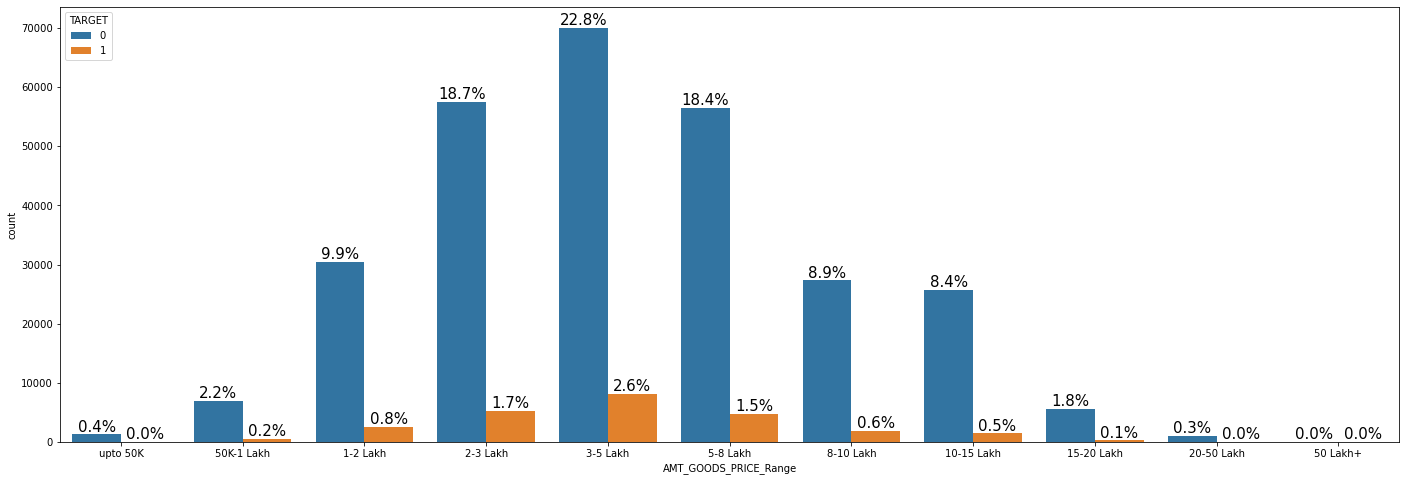

In [51]:
Plot_BarGraph( df2['AMT_GOODS_PRICE_Range'], 24, 12)

In [52]:
#AMT_GOODS_PRICE
# From above plot, we can observer that there is co-relation Goods price of good that client asked for (if applicable) on the previous application
# For the range of 2 Lakh to 8 Lakh, there is more probability of loan defaulter comparae to other price range.

In [53]:
document_columns= ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4' ,'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
                   'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
                   'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14' ,'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
#int (int(len(document_columns))/4)
print (pd.value_counts(df2["FLAG_DOCUMENT_3"], sort=False))

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


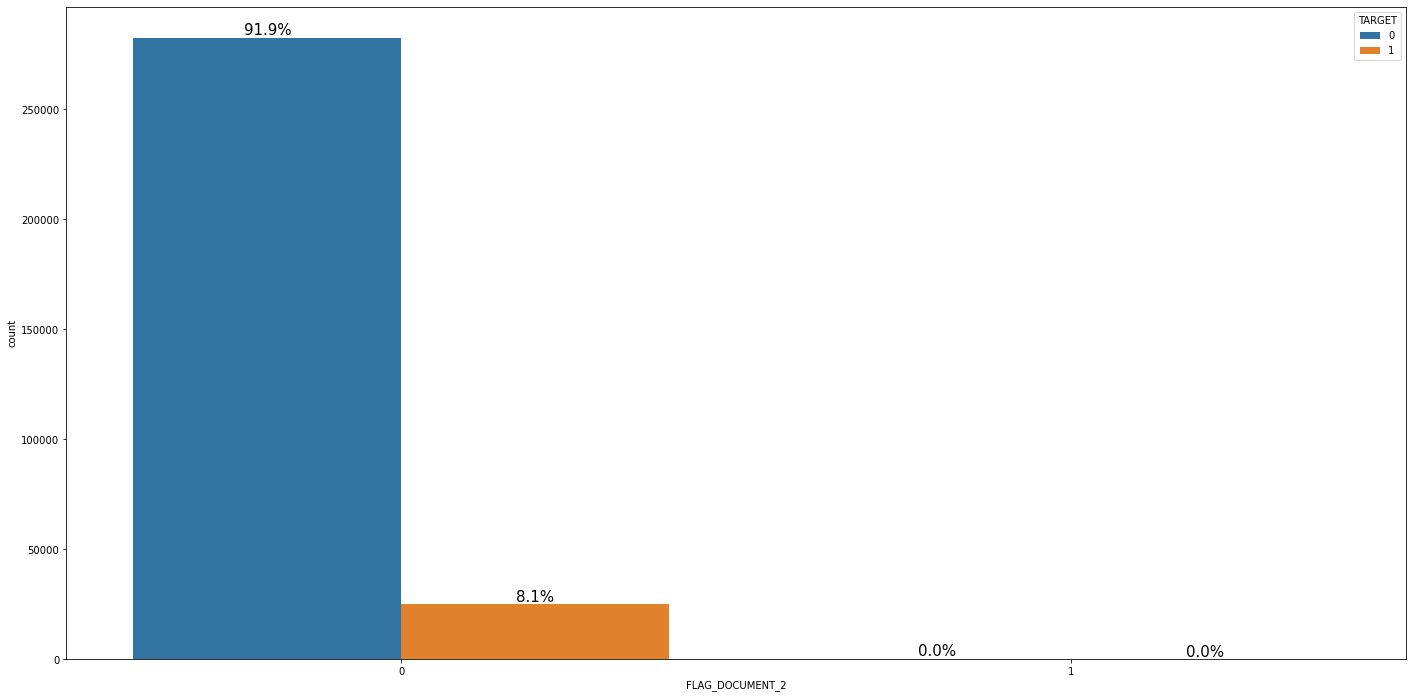

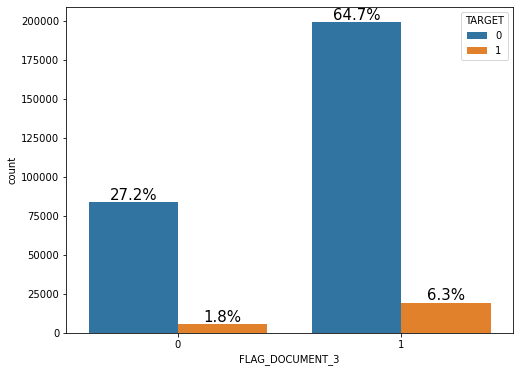

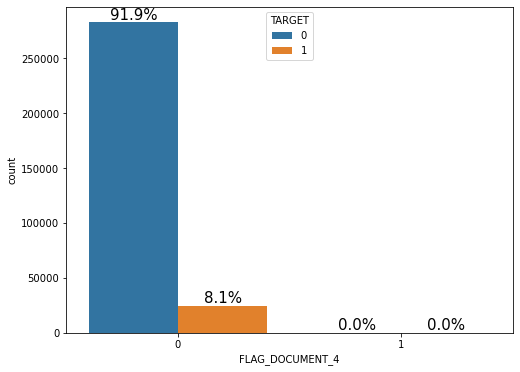

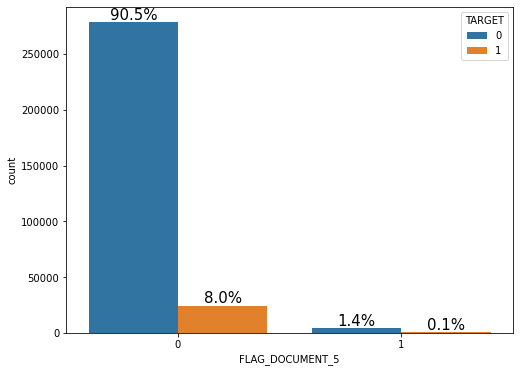

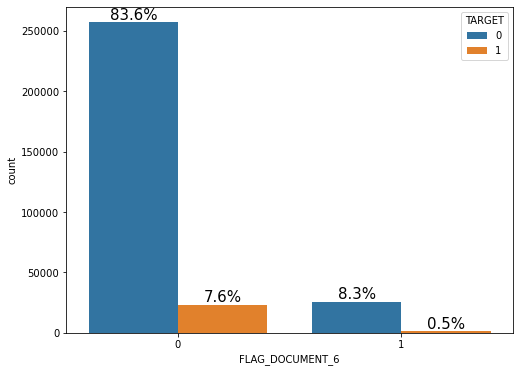

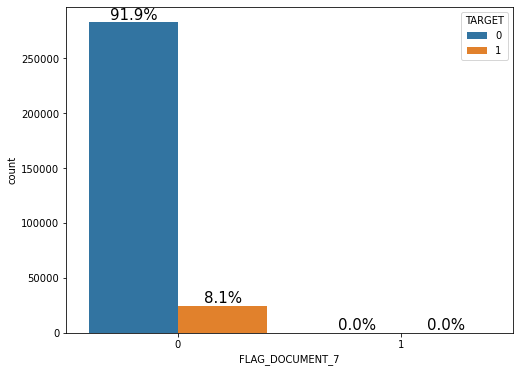

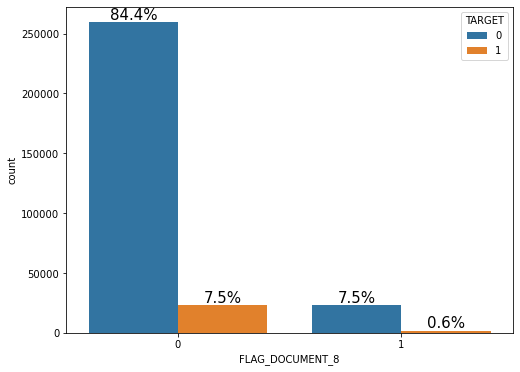

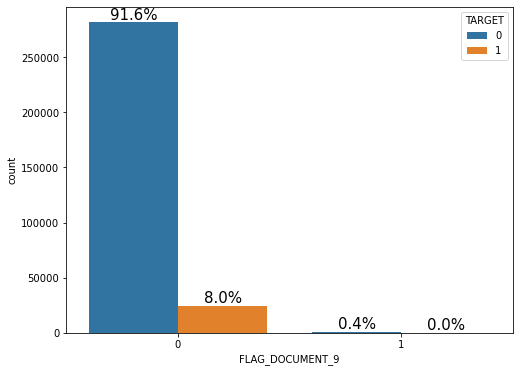

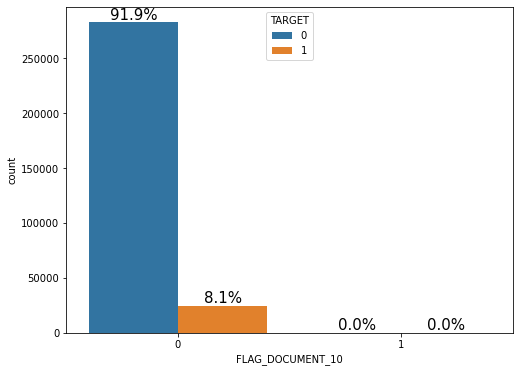

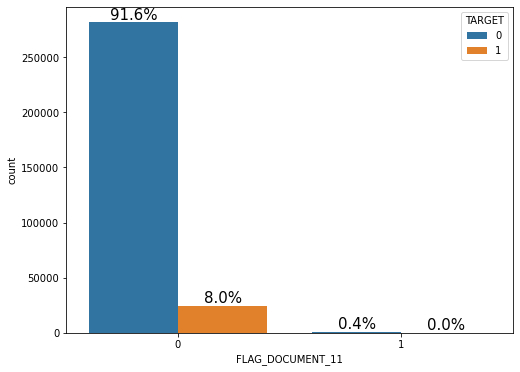

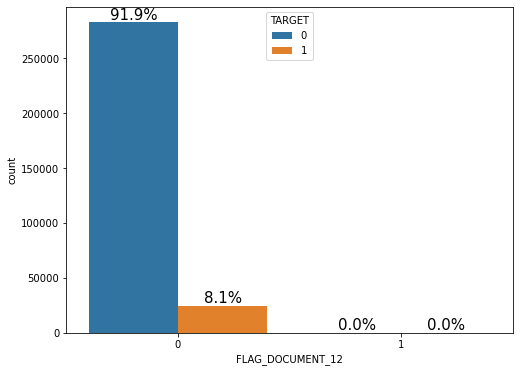

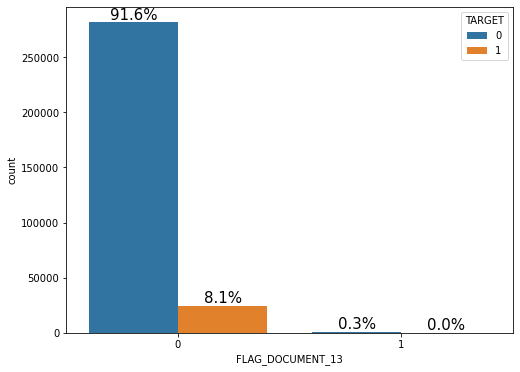

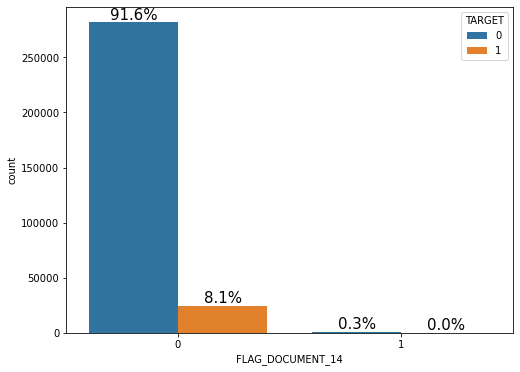

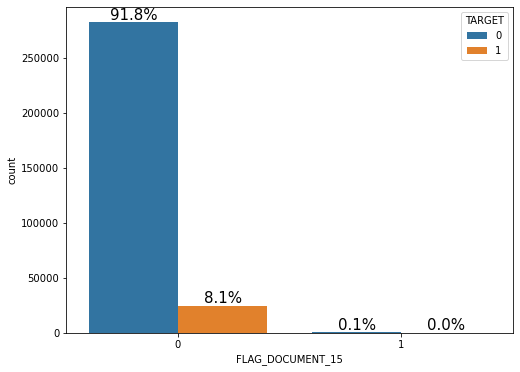

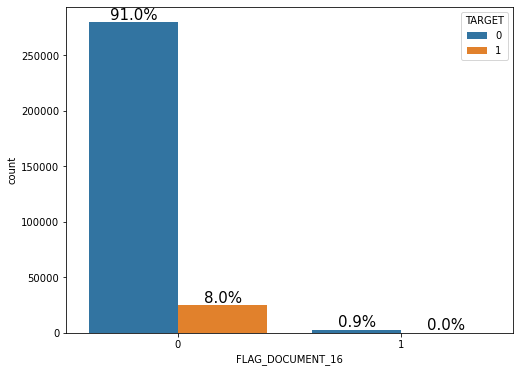

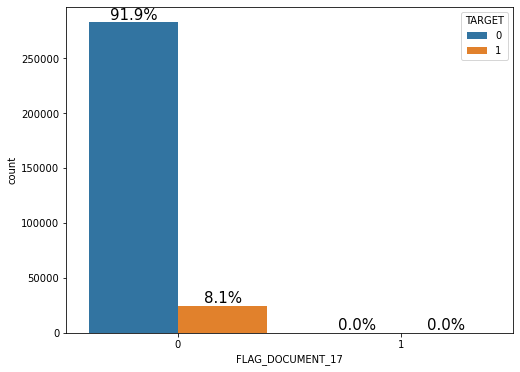

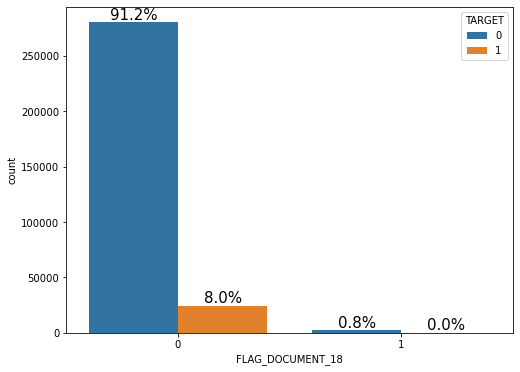

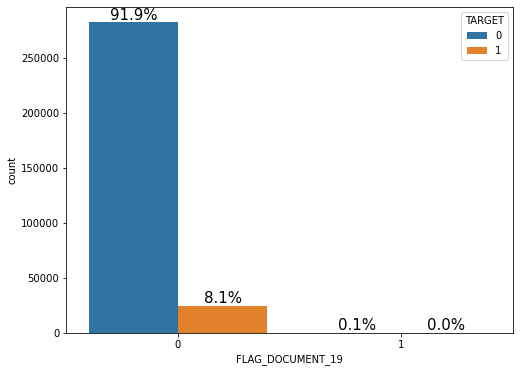

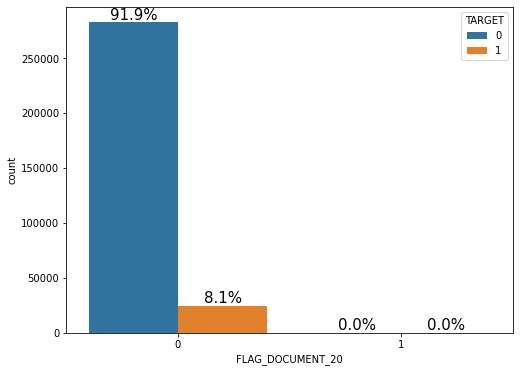

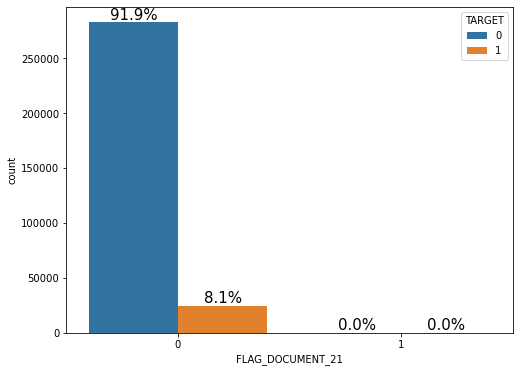

In [54]:
for FlagDocumentName in document_columns:
    Plot_BarGraph(FlagDocumentName, 8, 6)
    #print(FlagDocumentName)

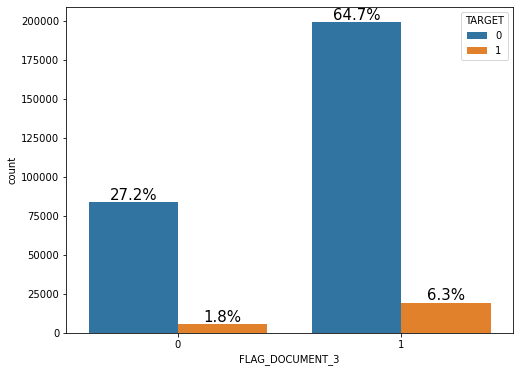

In [55]:
Plot_BarGraph('FLAG_DOCUMENT_3', 12, 8)

In [56]:


# As we can there is not enough data for clients who have submitted FLAG_DOCUMENTs except FLAG_DOCUMENT_3.
# Even for FLAG_DOCUMENT_3: Even after submitting FLAG_DOCUMENT_3, clients have more % with payment difficulties compared to who has have not submitted this document.

# Hence we can predict the loan defaulter probaility based on the submission of Flag Document. 



In [57]:
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY , AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON , AMT_REQ_CREDIT_BUREAU_QRT  
#AMT_REQ_CREDIT_BUREAU_YEAR , EXT_SOURCE_3 , YEARS_BEGINEXPLUATATION_MODE, YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE  
# There is no enough data to predict the client will be loan defaulter or not.


In [58]:
# Also the data where we have DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE   
# Where we can see the client's social circles' loan defaulter, does not give enough data for getting the probaility client's loan repayment difficulties

In [59]:
#CNT_CHILDREN, CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'

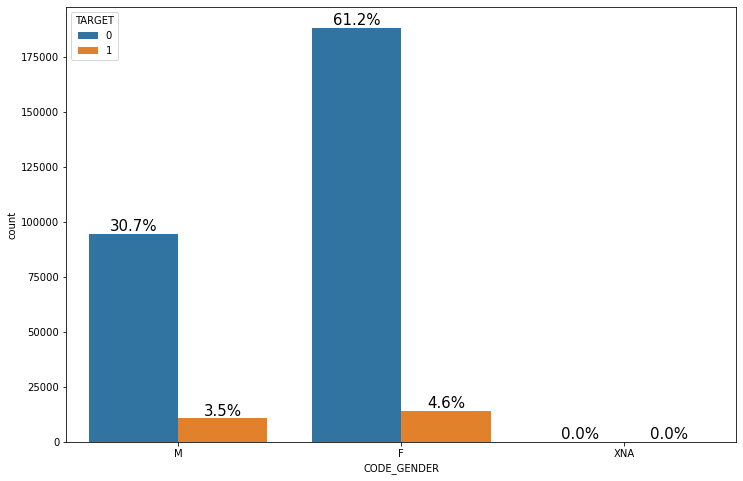

In [60]:
Plot_BarGraph('CODE_GENDER', 6, 6)

In [61]:
# As we can see there is more probability of Femal to be loan defaulters than male

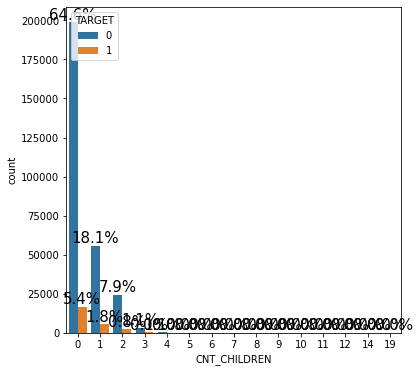

In [62]:
Plot_BarGraph('CNT_CHILDREN', 24, 8)

In [63]:
# As we can see from above graph, there is less chances of loan default with people with children than no children

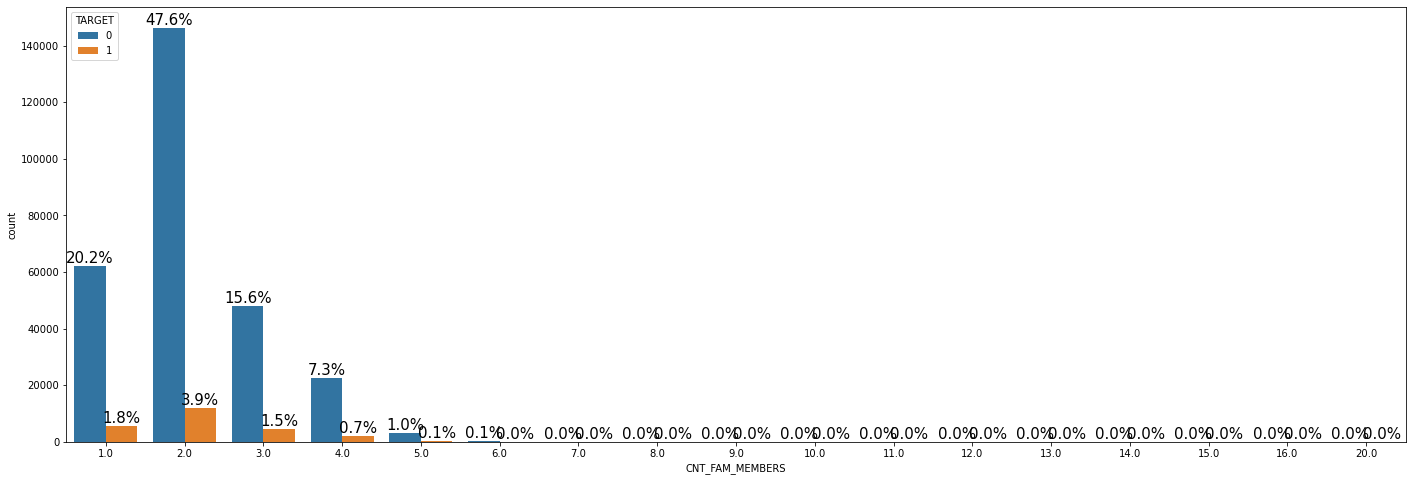

In [64]:
Plot_BarGraph('CNT_FAM_MEMBERS', 6, 6) 

In [65]:
# As we can see from above graph, there is less chances of loan default with people having family member more than 3 

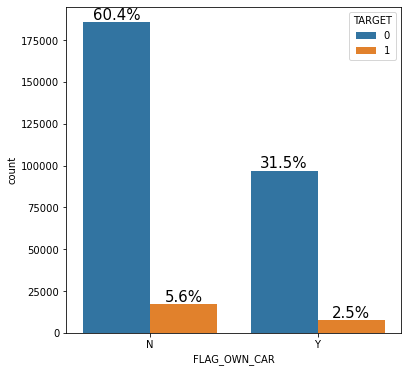

In [66]:
Plot_BarGraph('FLAG_OWN_CAR', 6, 6)

In [67]:
# As we can see from above graph, there is less chances of loan default with people having car than not having car.

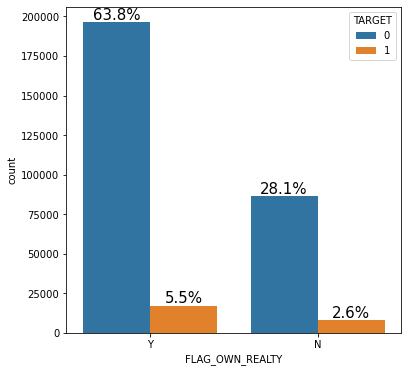

In [68]:
Plot_BarGraph('FLAG_OWN_REALTY', 6, 6)

In [69]:
# As we can see from above graph, there is more probability of loan default with client having own houe than not having own house.

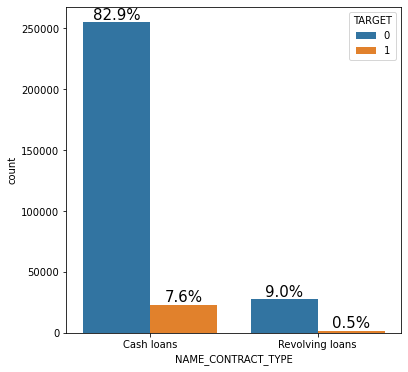

In [70]:
Plot_BarGraph('NAME_CONTRACT_TYPE', 6, 6) 

In [71]:
# As we can see from above graph, there is more probability of loan default with client having cash loan than other types of loans

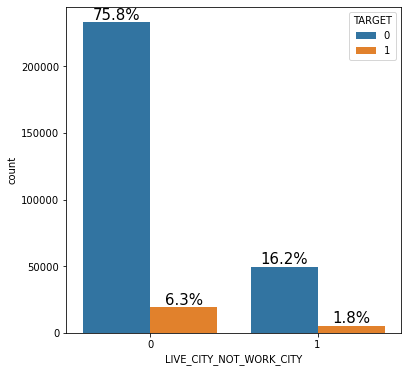

In [72]:
Plot_BarGraph('LIVE_CITY_NOT_WORK_CITY', 6, 6) 

In [73]:
# There is more probability of loan default with client living in one ity and work in another.

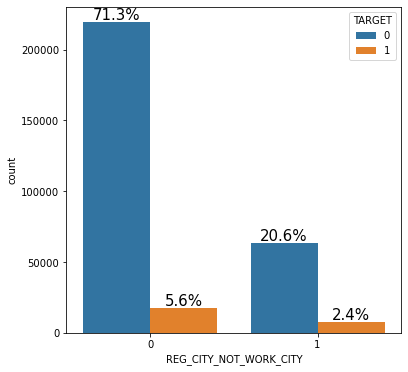

In [74]:
Plot_BarGraph('REG_CITY_NOT_WORK_CITY', 6, 6) 

In [75]:
# There is more probability of loan default if client's permanent address does not match contact address

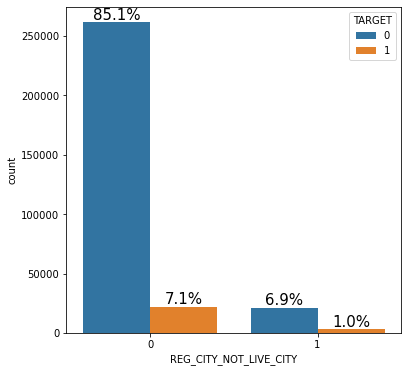

In [76]:
Plot_BarGraph('REG_CITY_NOT_LIVE_CITY', 6, 6) 

In [77]:
# There is more probability of loan default if client's permanent address does not match contact address

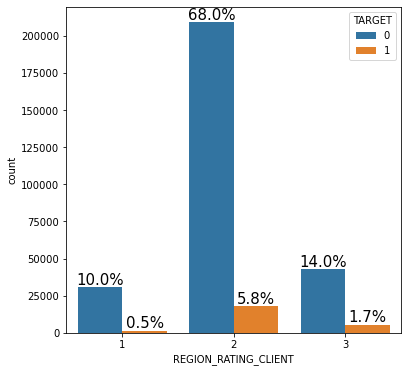

In [78]:
Plot_BarGraph('REGION_RATING_CLIENT', 6, 6)  

In [79]:
# There is more probability of loan default for client living in rank 2 city

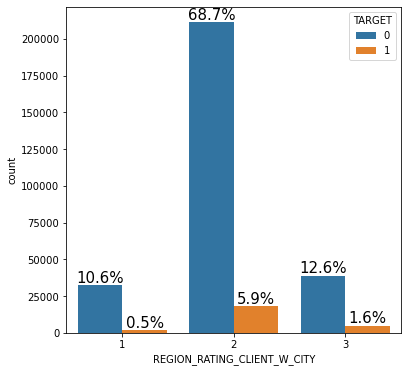

In [80]:
Plot_BarGraph('REGION_RATING_CLIENT_W_CITY', 6, 6) 

In [81]:
# There is more probability of loan default for client WORKING in rank 2 city

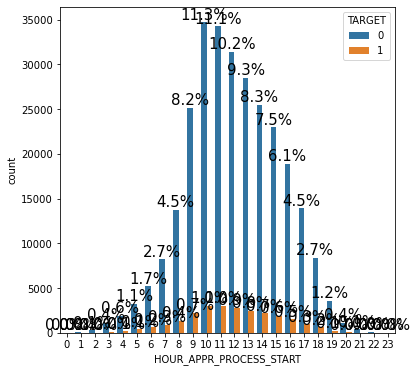

In [82]:
Plot_BarGraph('HOUR_APPR_PROCESS_START', 24, 8) 

In [83]:
# We can not predict probability of loan default based Approximately at what hour did the client apply for the loan.
# Since most the application came in the day. 

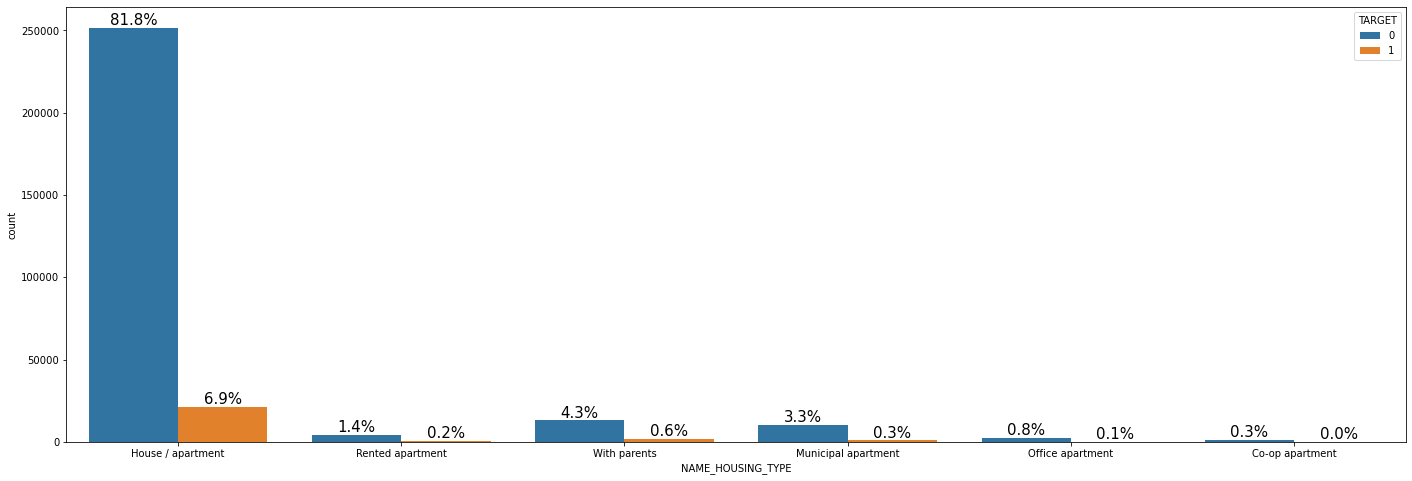

In [84]:
Plot_BarGraph('NAME_HOUSING_TYPE', 24, 8)    

In [85]:
# We can not predict probability of loan default based just category of House/Apartment though this category of more loan defaulter
# However more than 80% loan applicant comes under this catogory, we would need further classification to analyze the loan defulater probablity. 

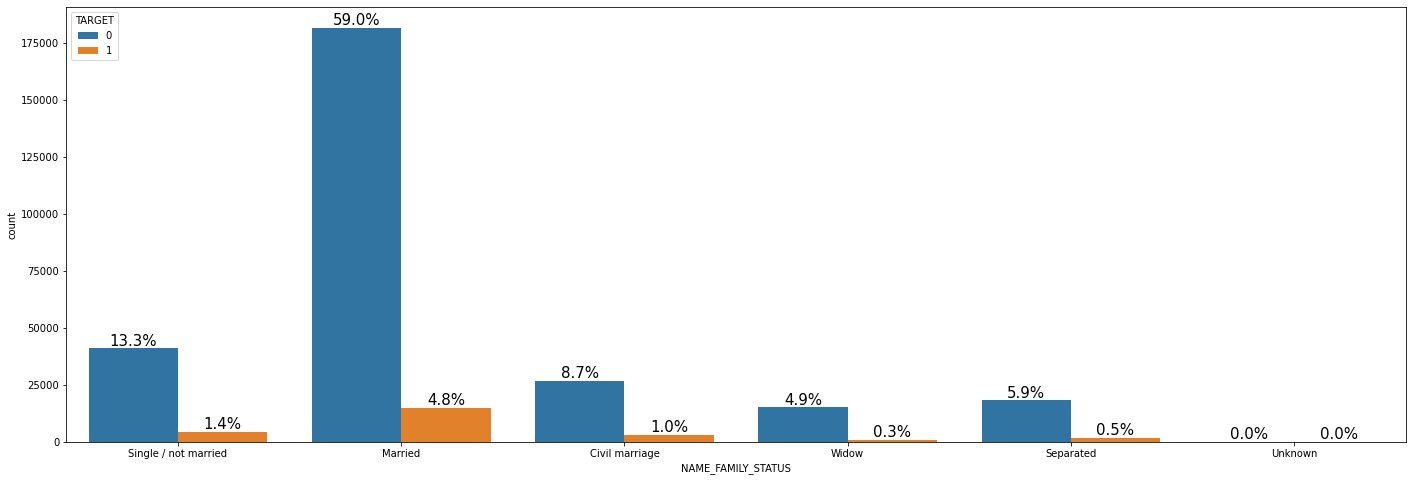

In [86]:
Plot_BarGraph('NAME_FAMILY_STATUS', 6, 6)    

In [87]:
# There is more probability of loan default for married people.

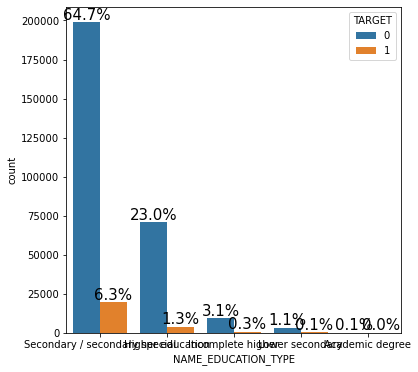

In [88]:
Plot_BarGraph('NAME_EDUCATION_TYPE', 24, 8)       

In [89]:
# There is more probability of loan default for less educated clients than highly educated cleints.

#  HeatMap  - Bivariate Analysis

### Prepare data for HeatMap based on the Column which has good probability to identify Loan Defaulters and then create 2 different 
### Dataframes for Target as 0 and 1 (Non-Defaulter and Defaulters)

In [90]:



NumericalData_col = [ 'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS' , 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                     'NAME_CONTRACT_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 
                     'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE']
CategorialData_col = ['OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'Age', 
                       'AMT_CREDIT', 'ORGANIZATION_TYPE', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE']

MergedData_col = NumericalData_col + CategorialData_col

print(MergedData_col)



['CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_CONTRACT_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'Age', 'AMT_CREDIT', 'ORGANIZATION_TYPE', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE']


In [91]:
df_Defaulter = df2.loc[df2['TARGET'] == 1]
df_NonDefaulter = df2.loc[df2['TARGET'] == 0]



In [92]:
#print(df_Defaulter.info())


In [93]:
#print(df_NonDefaulter.info())

In [94]:
Num_df1 =  df_Defaulter.filter(NumericalData_col, axis=1)
Categ_df1 =  df_Defaulter.filter(CategorialData_col, axis=1)
Both_Num_Cat_df1 = df_Defaulter.filter(MergedData_col, axis=1)

Num_df0 =  df_NonDefaulter.filter(NumericalData_col, axis=1)
Categ_df0 =  df_NonDefaulter.filter(CategorialData_col, axis=1)
Both_Num_Cat_df0 = df_NonDefaulter.filter(MergedData_col, axis=1)

In [95]:
Num_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CODE_GENDER                  24825 non-null  object 
 1   CNT_CHILDREN                 24825 non-null  int64  
 2   CNT_FAM_MEMBERS              24825 non-null  float64
 3   NAME_FAMILY_STATUS           24825 non-null  object 
 4   FLAG_OWN_CAR                 24825 non-null  object 
 5   FLAG_OWN_REALTY              24825 non-null  object 
 6   NAME_CONTRACT_TYPE           24825 non-null  object 
 7   LIVE_CITY_NOT_WORK_CITY      24825 non-null  int64  
 8   REG_CITY_NOT_WORK_CITY       24825 non-null  int64  
 9   REG_CITY_NOT_LIVE_CITY       24825 non-null  int64  
 10  REGION_RATING_CLIENT         24825 non-null  int64  
 11  REGION_RATING_CLIENT_W_CITY  24825 non-null  int64  
 12  HOUR_APPR_PROCESS_START      24825 non-null  int64  
 13  NAME_EDUCATION_

In [96]:
Categ_df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OCCUPATION_TYPE             282686 non-null  object 
 1   AMT_INCOME_TOTAL            282686 non-null  float64
 2   Age                         282686 non-null  float64
 3   AMT_CREDIT                  282686 non-null  float64
 4   ORGANIZATION_TYPE           282686 non-null  object 
 5   AMT_ANNUITY                 282674 non-null  float64
 6   REGION_POPULATION_RELATIVE  282686 non-null  float64
 7   AMT_GOODS_PRICE             282429 non-null  float64
dtypes: float64(6), object(2)
memory usage: 19.4+ MB


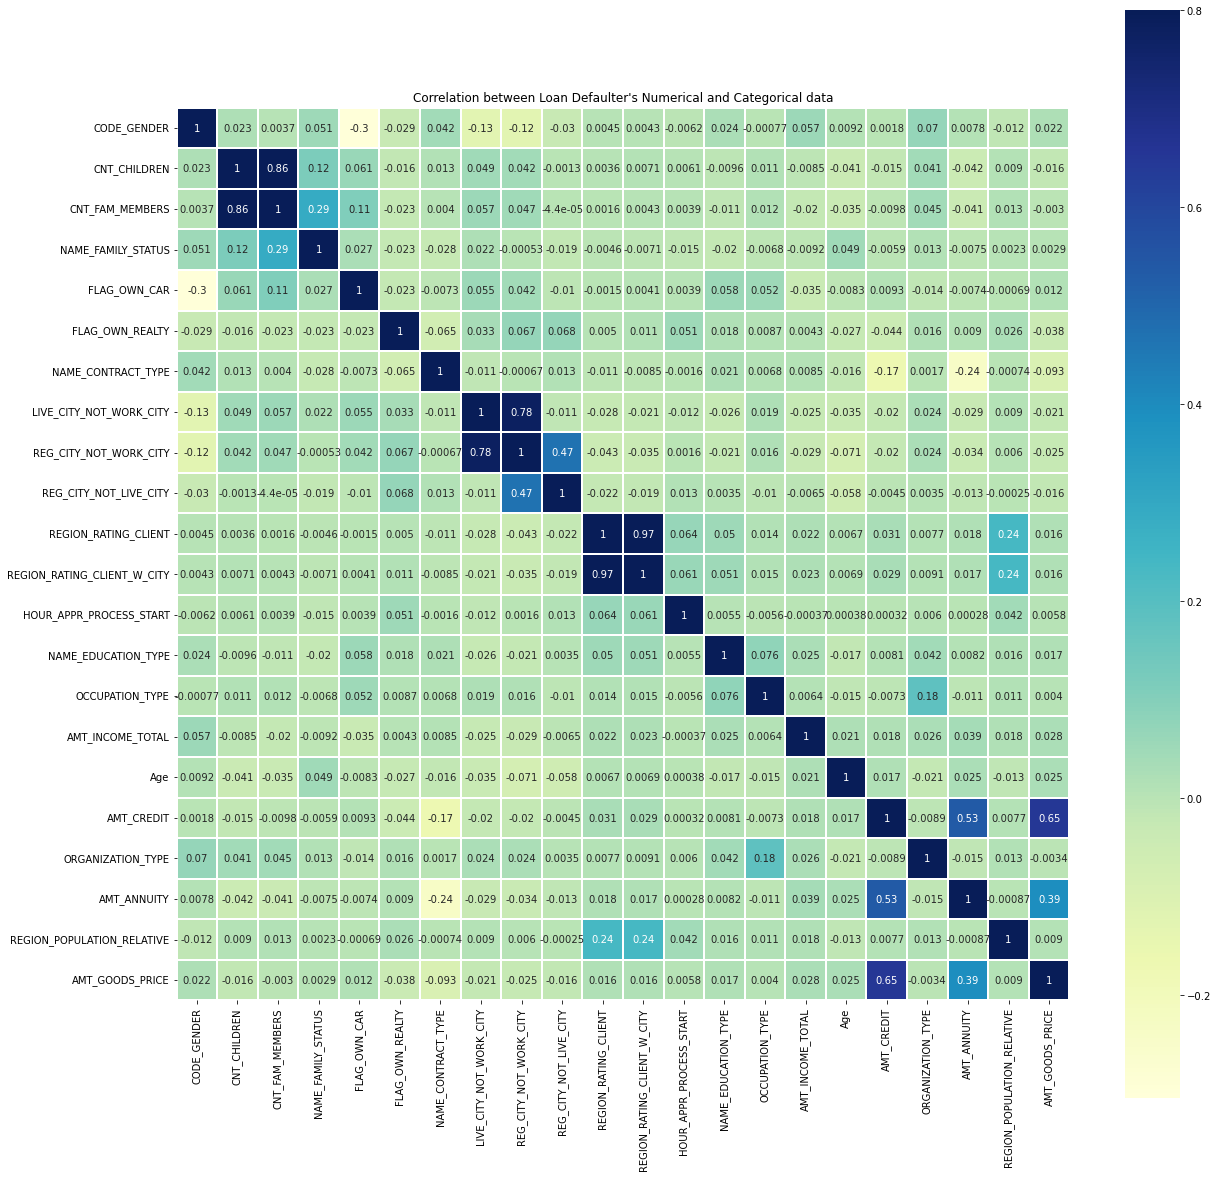

In [97]:
#corr=Both_Num_Cat_df1.corr()#["Loan Defaulter Numerical and Categorical data"]
plt.figure(figsize=(20, 20))

sns.heatmap(Both_Num_Cat_df1.apply(lambda x: x.factorize()[0]).corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title("Correlation between Loan Defaulter's Numerical and Categorical data");

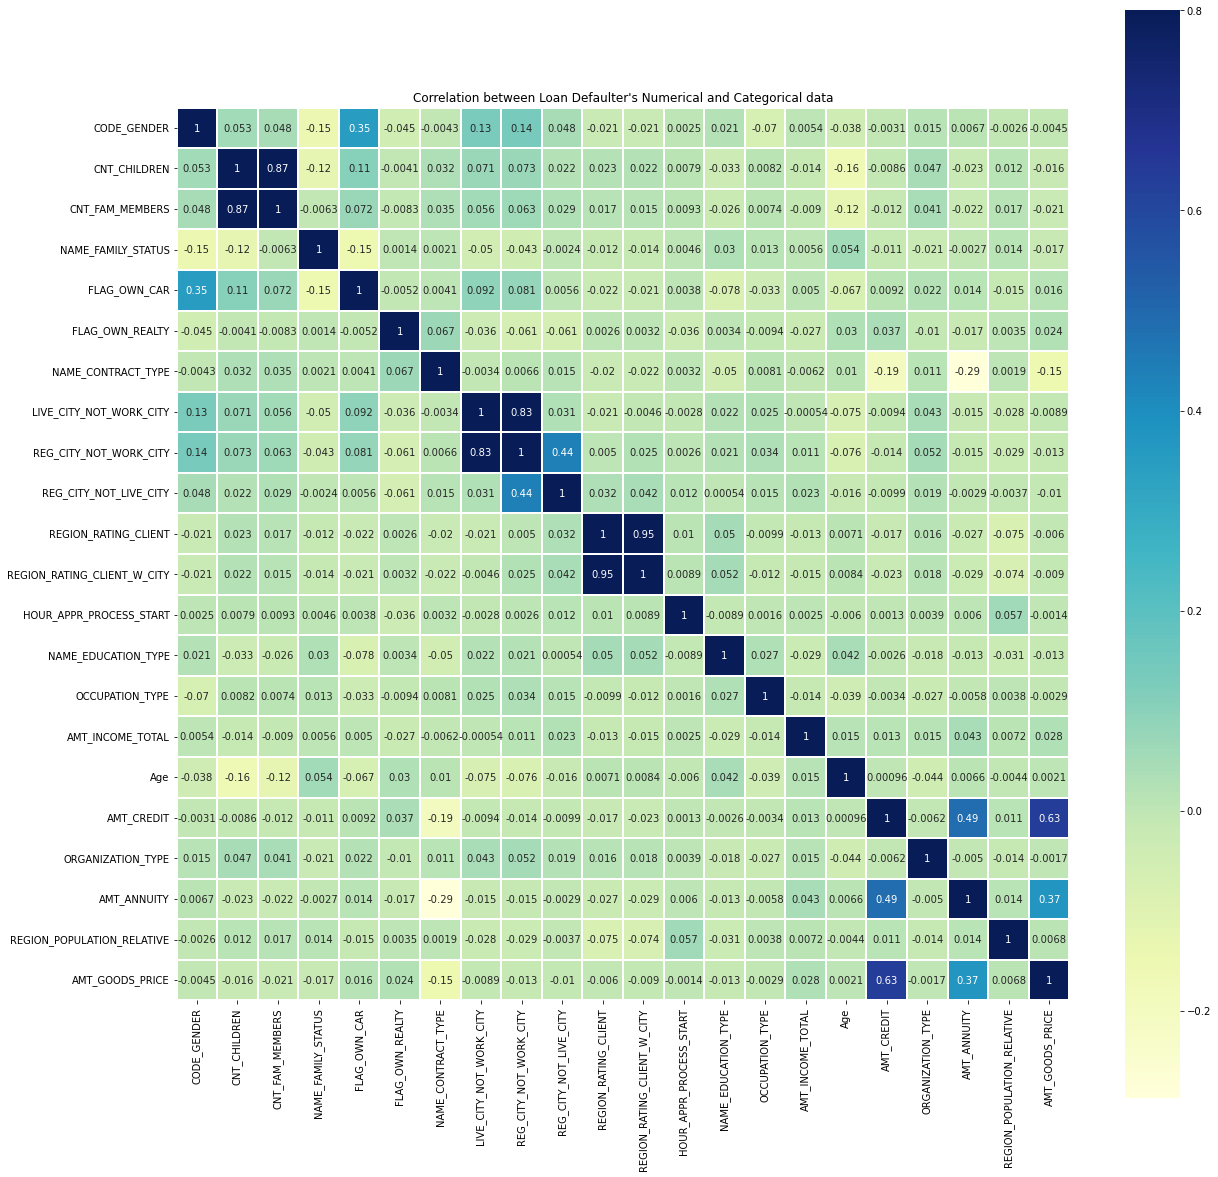

In [98]:
#corr=Both_Num_Cat_df1.corr()#["Loan Defaulter Numerical and Categorical data"]
plt.figure(figsize=(20, 20))

sns.heatmap(Both_Num_Cat_df0.apply(lambda x: x.factorize()[0]).corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title("Correlation between Loan Defaulter's Numerical and Categorical data");

# 
'CODE_GENDER', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
'NAME_CONTRACT_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 
'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE', 
'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'Age', 'AMT_CREDIT', 'ORGANIZATION_TYPE', 'AMT_ANNUITY', 
'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE']

#  Based on the HeatMap, we have got following 4 top Correlated pairs for application_data

### 1. CODE_GENDER and FLAG_OWN_CAR :  -0.3 and 0.35
### 2. CODE_GENDER and LIVE_CITY_NOT_WORK_CITY/REG_CITY_NOT_WORK_CITY:  -0.12 and 0.13
### 3. CNT_CHILDREN and NAME_FAMILY_STATUS: -0.12 and 0.12
#### 4. ORGANIZATION_TYPE and OCCUPATION_TYPE: 0.18 and -0.027

# Part 2: Now for previous_application.csv

### Removing columns which has more than 50% of NaN values

In [99]:
df1 = prev_df.loc[:, prev_df.isnull().mean() <= .5]

#df.info()

In [100]:
#df1.info()#print ("Missing values per column:")
#print (df1.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

## Changing the 'Unused offer' for the NAME_CONTRACT_STATUS to 'Approved' and removing 'Cancelled' since there is final result whether the loan was approved or rejected . This will give us only 2 types of status: Approved and Refused

In [101]:
df1.loc[df1['NAME_CONTRACT_STATUS'] == 'Unused offer', 'NAME_CONTRACT_STATUS'] = 'Approved'

In [102]:
df1 = df1[df1.NAME_CONTRACT_STATUS != 'Canceled']

In [103]:
print (pd.value_counts(df1["NAME_CONTRACT_STATUS"], sort=False))

Approved    1063217
Refused      290678
Name: NAME_CONTRACT_STATUS, dtype: int64


In [104]:
def Plot_BarGraph_Prev(ColumnName, row, col):
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [row, col]
    ax = sns.countplot(x=ColumnName, hue="NAME_CONTRACT_STATUS", data=df1)
    plt.setp(ax.get_xticklabels(), rotation = 0)
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        percent = ((height)/(len(df1))) * 100
        ax.text(p.get_x()+p.get_width()/2., height + 0.5,'%.1f' % percent + "%", ha = "center", va = "bottom", fontsize = 15)

    plt.show()

In [105]:
def Plot_BarGraph_LimitedColumns_Prev(ColumnName, row, col):
    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = [row, col]
    ax = sns.countplot(x=ColumnName, hue="NAME_CONTRACT_STATUS", data=df1)
    #ax = sns.countplot(x=ColumnName, hue="TARGET", data=df, order=temp_df[ColumnName].value_counts().iloc[:10].index)
    plt.setp(ax.get_xticklabels(), rotation =90)
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        percent = ((height)/(len(df1))) * 100
        #ax.text(p.get_x()+p.get_width()/2., height + 0.5,'%.1f' % percent + "%", ha = "center", va = "bottom", fontsize = 15)

    plt.show()



plt.subplots_adjust(hspace=1)

<Figure size 1728x576 with 0 Axes>

In [106]:
#Name_Product_Type = Sell, Walk-in 
print (pd.value_counts(df1["NAME_PRODUCT_TYPE"], sort=False))

XNA        757643
x-sell     447852
walk-in    148400
Name: NAME_PRODUCT_TYPE, dtype: int64


In [107]:
print (pd.value_counts(df1['NAME_CONTRACT_STATUS'], sort=False))

Approved    1063217
Refused      290678
Name: NAME_CONTRACT_STATUS, dtype: int64


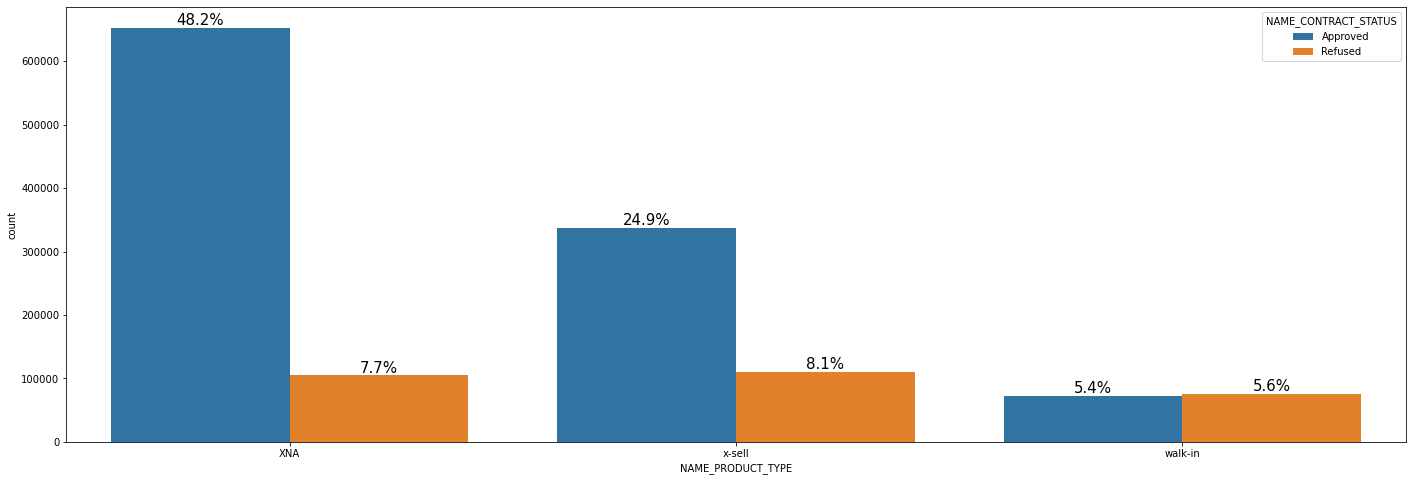

In [108]:
Plot_BarGraph_Prev( df1['NAME_PRODUCT_TYPE'], 12, 8)

### As we observer that the Direct sell has more chances of refusal of 8.1% which more than walk-in of 5.6%. 
Therfore we could conclude that thre is probability of loan-defaulters on Walk-in clients. 

In [109]:
#CHANNEL_TYPE : Through which channel we acquired the client on the previous application
print (pd.value_counts(df1['CHANNEL_TYPE'], sort=False))

Country-wide                  492908
Contact center                 40786
Credit and cash offices       439995
Stone                         212016
Regional / Local              108433
AP+ (Cash loan)                53335
Channel of corporate sales      6014
Car dealer                       408
Name: CHANNEL_TYPE, dtype: int64


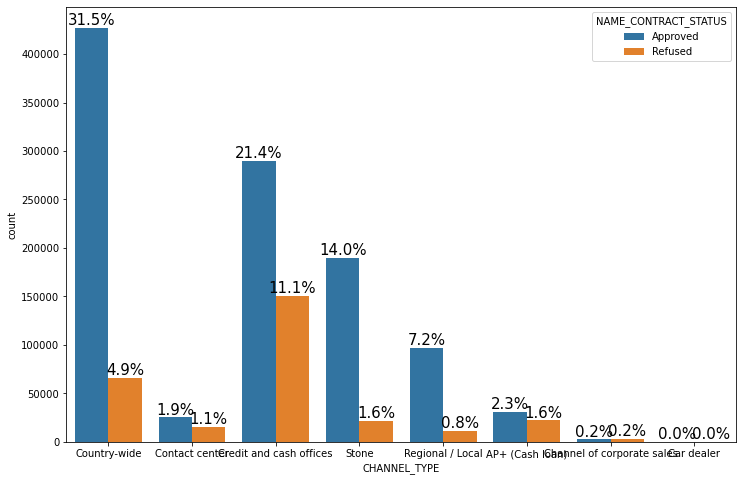

In [110]:
Plot_BarGraph_Prev( df1['CHANNEL_TYPE'], 24, 8)

In [111]:
# As we can see there is high probablity of loan defaulters for  Credit and cash offices, Country-wide sell channels 
#since the rejection % for them has more %.

In [112]:
#NAME_YIELD_GROUP : Grouped interest rate into small medium and high of the previous application
print (pd.value_counts(df1['NAME_YIELD_GROUP'], sort=False))

middle        382278
low_action     91080
high          352333
low_normal    317267
XNA           210937
Name: NAME_YIELD_GROUP, dtype: int64


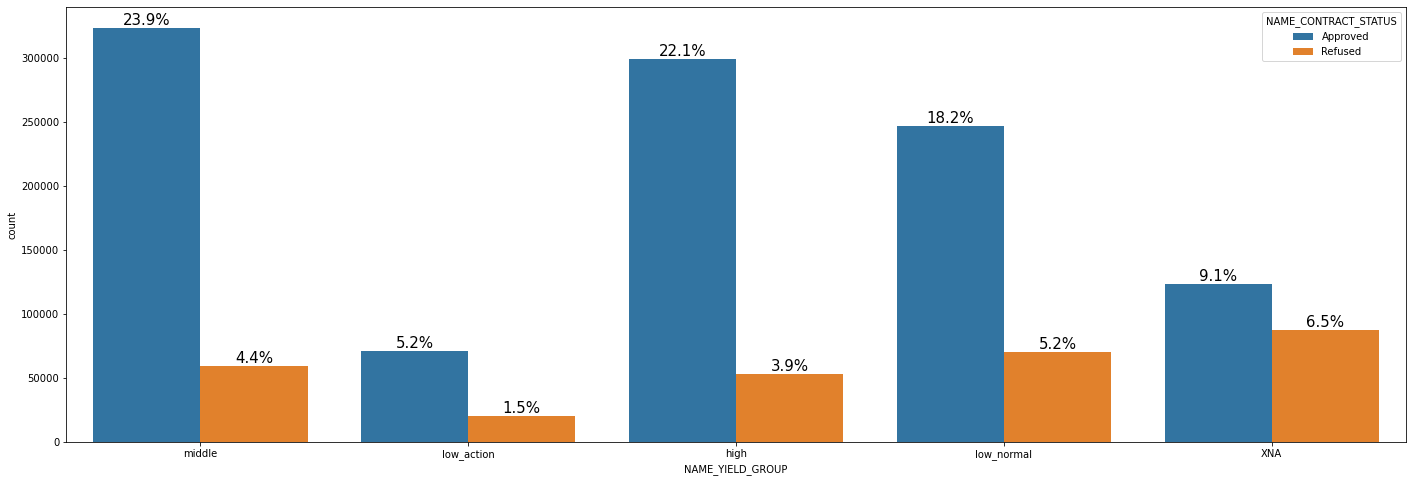

In [113]:
Plot_BarGraph_Prev( df1['NAME_YIELD_GROUP'], 12, 6)

In [114]:
# As we can see there is less probablity of loan defaulters for Low Interest Rate compared to medium or high interest rates
#since the rejection % for them has more %.

In [115]:
#NAME_SELLER_INDUSTRY : The industry of the seller
print (pd.value_counts(df1['NAME_SELLER_INDUSTRY'], sort=False))

Connectivity            274379
XNA                     541859
Consumer electronics    398017
Industry                 19144
Clothing                 23948
Furniture                57563
Construction             29770
Jewelry                   2708
Auto technology           4988
MLM partners              1006
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64


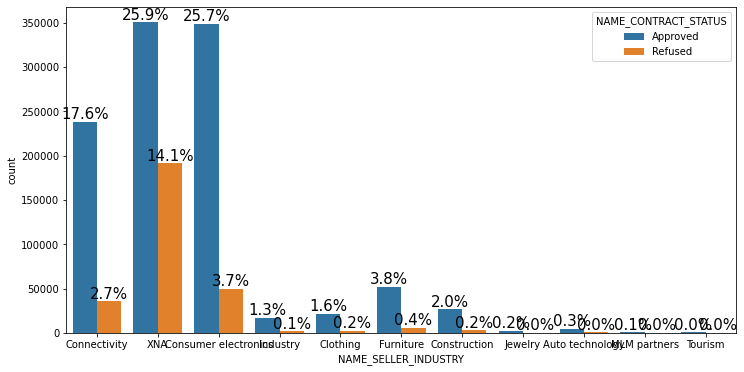

In [116]:
Plot_BarGraph_Prev( df1['NAME_SELLER_INDUSTRY'], 24, 8)

In [117]:
# As we can see there is high probablity of loan defaulters for electronics (Consumer electronics and Connectivity) 
#since the rejection % for them has more %.

In [118]:
#NAME_PORTFOLIO : Was the previous application for CASH, POS, CAR, …
print (pd.value_counts(df1['NAME_PORTFOLIO'], sort=False))

POS      690837
Cash     451740
Cards    144512
XNA       66425
Cars        381
Name: NAME_PORTFOLIO, dtype: int64


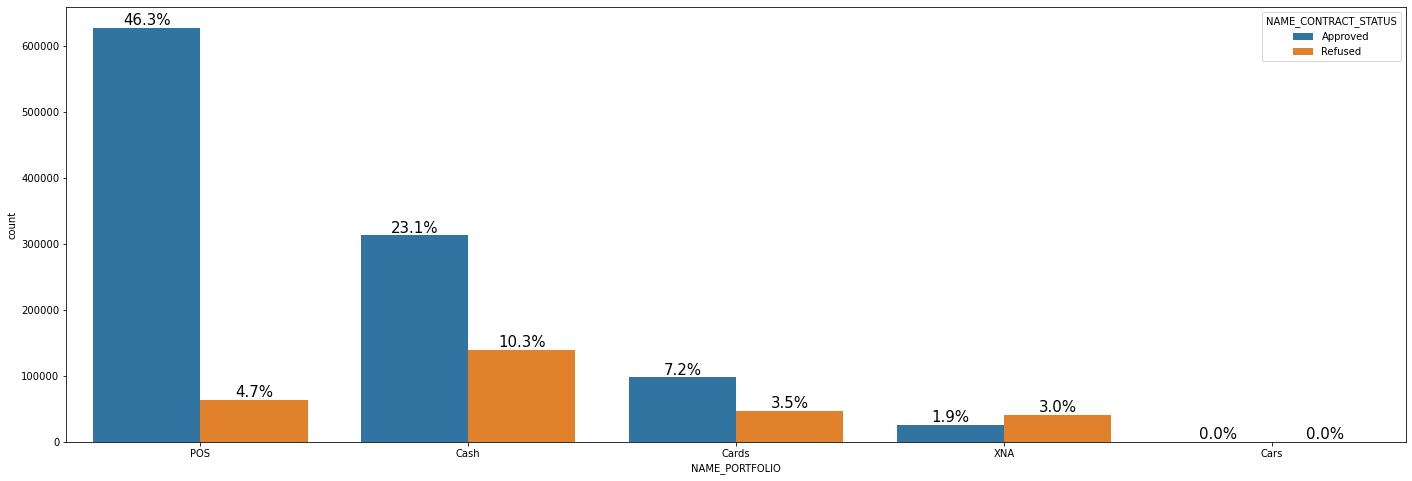

In [119]:
Plot_BarGraph_Prev( df1['NAME_PORTFOLIO'], 12, 6)

In [120]:
# As we can see there is high probablity of loan defaulters for cash loans coapred to other loans 
#since the rejection % for them has more %.

In [121]:
#NAME_CLIENT_TYPE : Was the client old or new client when applying for the previous application
print (pd.value_counts(df1['NAME_CLIENT_TYPE'], sort=False))

Repeater     939029
New          297815
Refreshed    116086
XNA             965
Name: NAME_CLIENT_TYPE, dtype: int64


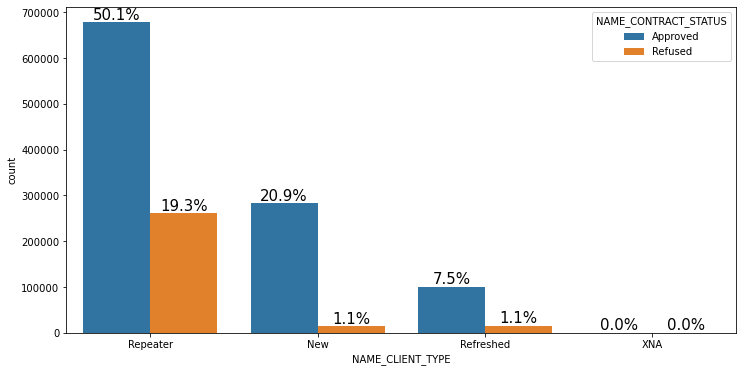

In [122]:
Plot_BarGraph_Prev( df1['NAME_CLIENT_TYPE'], 12, 6)

In [123]:
# As we can see there is high probablity of loan defaulters for Repeat clients compared to new ones or refreshed 
#since the rejection % for them has more %.

In [124]:
#CODE_REJECT_REASON : Why was the previous application rejected
print (pd.value_counts(df1['CODE_REJECT_REASON'], sort=False))

XAP       1036774
HC         175231
LIMIT       55680
CLIENT      26436
SCOFR       12811
SCO         37467
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64


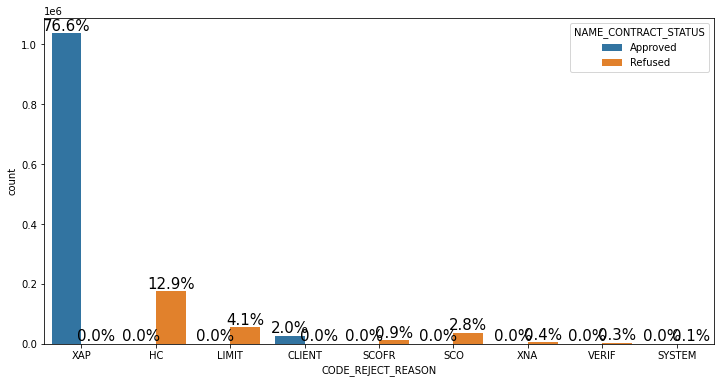

In [125]:
Plot_BarGraph_Prev( df1['CODE_REJECT_REASON'], 20, 8)

In [126]:
# As we can see there is high probablity of loan defaulters for HC and over limit and SCO types 
#since the rejection % for them has more %.

In [127]:
#NFLAG_LAST_APPL_IN_DAY : Flag if the application was the last application per day of the client. 
#Sometimes clients apply for more applications a day. Rarely it could also be error in our system that 
#one application is in the database twice

print (pd.value_counts(df1['NFLAG_LAST_APPL_IN_DAY'], sort=False))

1    1347995
0       5900
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64


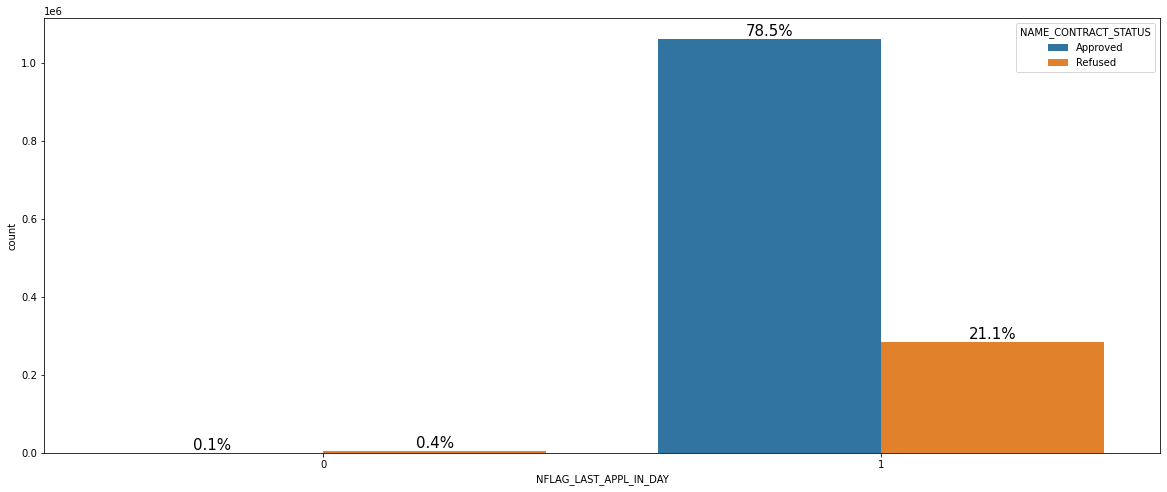

In [128]:
Plot_BarGraph_Prev( df1['NFLAG_LAST_APPL_IN_DAY'], 10, 6)

In [129]:
# As we can see there is less data for Last Application status, hence we can predict the loan defaulter probability in this case


In [130]:
#NAME_CONTRACT_TYPE : Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application

print (pd.value_counts(df1['NAME_CONTRACT_TYPE'], sort=False))

Consumer loans     727592
Cash loans         478962
Revolving loans    147310
XNA                    31
Name: NAME_CONTRACT_TYPE, dtype: int64


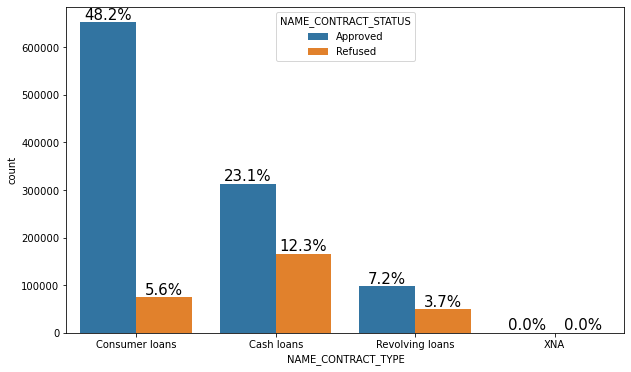

In [131]:
Plot_BarGraph_Prev( df1['NAME_CONTRACT_TYPE'], 12, 6)

In [132]:
# As we can see there is high probablity of loan defaulters for Cash Loans comapred to other types of loans
#since the rejection % for them has more %.

In [133]:
#NAME_PAYMENT_TYPE : Payment method that client chose to pay for the previous application

print (pd.value_counts(df1['NAME_PAYMENT_TYPE'], sort=False))

Cash through the bank                        1030362
XNA                                           314310
Non-cash from your account                      8158
Cashless from the account of the employer       1065
Name: NAME_PAYMENT_TYPE, dtype: int64


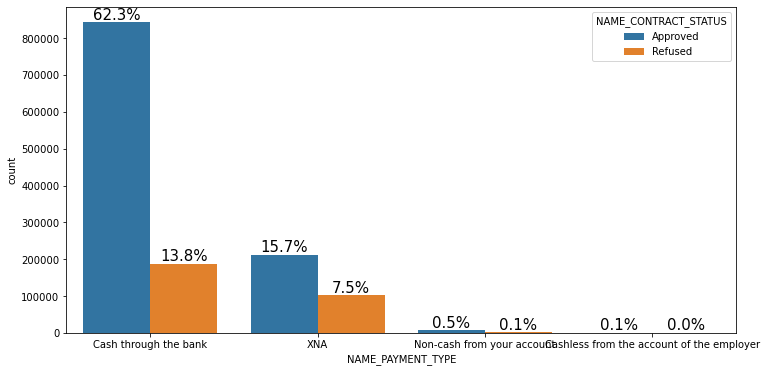

In [134]:
Plot_BarGraph_Prev( df1['NAME_PAYMENT_TYPE'], 24, 8)

In [135]:
# We can not idendify the probability of loan defaulter since only once type which is cash through bank is given

# 
#AMT_CREDIT :Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT
#AMT_APPLICATION	For how much credit did client ask on the previous application

Here to identify how Client was accessed with probability of Default can be identified from Actual Loan given against how much Client asked for the loan.
The reduced % will give good picture of Client's replayment capablity.



In [136]:
#print (pd.value_counts(df1['AMT_CREDIT'], sort=False))
#print (pd.value_counts(df1['AMT_APPLICATION'], sort=False))
df1['ApprovedLoanReduced%'] =  round( ( ( (df1['AMT_APPLICATION'] - df1['AMT_CREDIT'])/df1['AMT_APPLICATION'])*100),0)

In [137]:
#print (pd.value_counts(df1['ApprovedLoanReduced%'], sort=False))

#Lets create bin for approved loan reduced %

bins = [-500, -100, -50, -10, 0, 10, 20, 50, 100, 200, np.inf]
labels = [' Up to -100', '-100 to -50','-50 to -10','-10 to 0','0 to 10','10 to 20','20 to 50','50 to 100','100 to 200', np.inf ]
df1['ApprovedLoanReduced%_Range'] = pd.cut(df1['ApprovedLoanReduced%'], bins, labels=labels)
print (pd.value_counts(df1['ApprovedLoanReduced%_Range'], sort=False))


 Up to -100       468
-100 to -50      2589
-50 to -10     367245
-10 to 0       552384
0 to 10        223680
10 to 20        73138
20 to 50        43391
50 to 100        4120
100 to 200          0
inf                 0
Name: ApprovedLoanReduced%_Range, dtype: int64


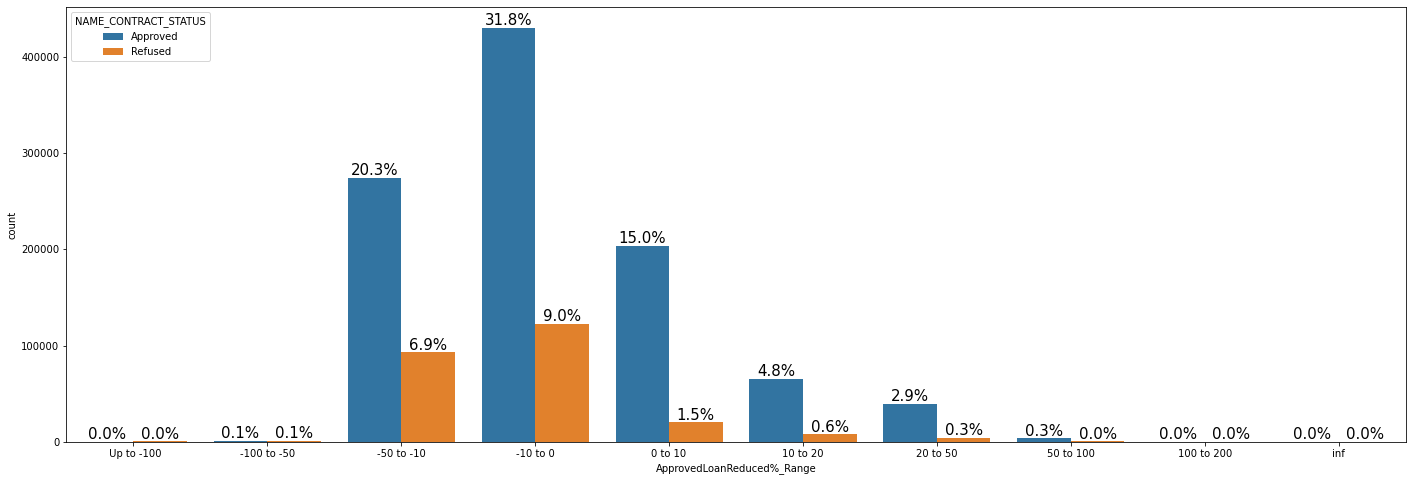

In [138]:
Plot_BarGraph_Prev( df1['ApprovedLoanReduced%_Range'], 24, 8)

In [139]:
# As we can see there is high probablity of loan defaulters loan approval amount reduced by -1 % to -50% compared to 
# loan approved for same or more amount what client asked for based on the rejection % for them has more %.

In [140]:
#AMT_GOODS_PRICE : Goods price of good that client asked for (if applicable) on the previous application

#print (pd.value_counts(df1['AMT_GOODS_PRICE'], sort=False))



In [141]:
bins = [0, 50000, 100000, 200000, 300000, 500000, 800000, 1000000, 1500000, 2000000, 5000000,  np.inf]
labels = [ 'upto 50K', '50K-1 Lakh', '1-2 Lakh', '2-3 Lakh', '3-5 Lakh', '5-8 Lakh', '8-10 Lakh', '10-15 Lakh', '15-20 Lakh', '20-50 Lakh', '50 Lakh+']
df1['AMT_GOODS_PRICE_Range'] = pd.cut(df1['AMT_GOODS_PRICE'], bins, labels=labels)

print (pd.value_counts(df1["AMT_GOODS_PRICE_Range"], sort=False))

upto 50K      309980
50K-1 Lakh    285090
1-2 Lakh      281006
2-3 Lakh      131186
3-5 Lakh      118623
5-8 Lakh       61605
8-10 Lakh      29324
10-15 Lakh     39197
15-20 Lakh      6662
20-50 Lakh      4412
50 Lakh+           4
Name: AMT_GOODS_PRICE_Range, dtype: int64


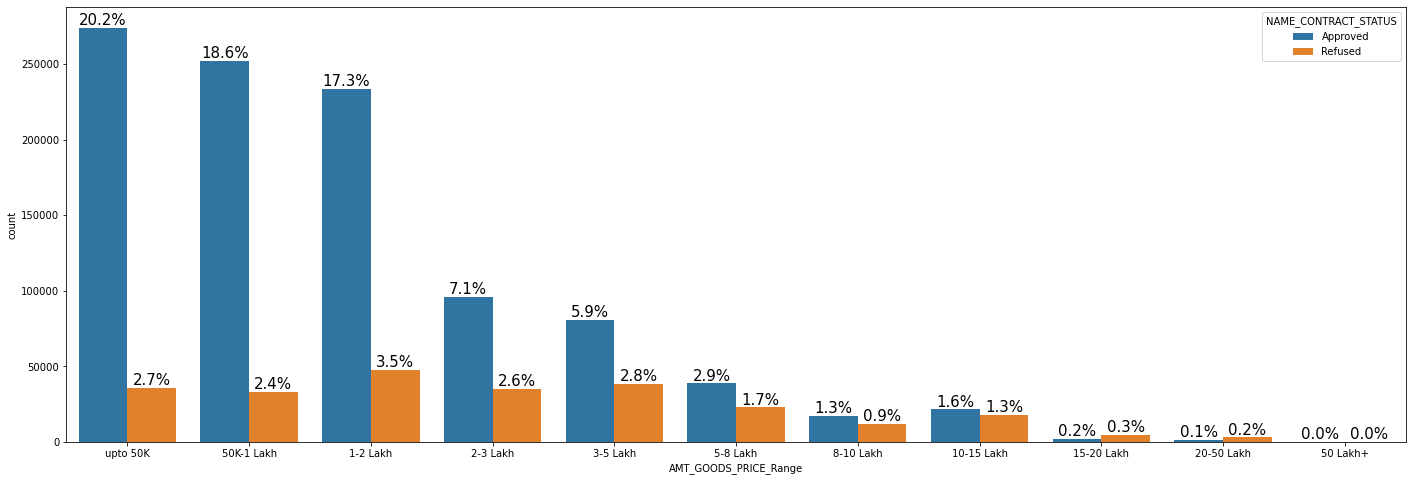

In [142]:
Plot_BarGraph_Prev( df1['AMT_GOODS_PRICE_Range'], 24, 8)

In [143]:
# As we can see there is high probablity of loan defaulters for loan taken for goods proced from INR 50000(50K) 
# to INR 500000 (5 Lakh) with highest for 1 Lakh - 2 Lakh.
# based on the rejection % in the graph

In [144]:
#AMT_ANNUITY - need to create categories/bins

bins = [0, 3000, 5000, 8000, 10000, 15000, 20000, 25000, 30000, 40000, 60000, 100000, 300000, np.inf]
labels = [ 'upto 3K', '3K-5K', '5K-8K', '8K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-40K', '40K-60K','60K-1Lakh', '1-3Lakh', '3 Lakh+']
df1['AMT_ANNUITY_Range'] = pd.cut(df1['AMT_ANNUITY'], bins, labels=labels)

print (pd.value_counts(df1["AMT_ANNUITY_Range"], sort=True))

10K-15K      242125
5K-8K        223074
3K-5K        146163
15K-20K      136530
8K-10K       129116
20K-25K      100004
upto 3K       76821
30K-40K       74531
40K-60K       67878
25K-30K       66986
60K-1Lakh     19928
1-3Lakh        2664
3 Lakh+           8
Name: AMT_ANNUITY_Range, dtype: int64


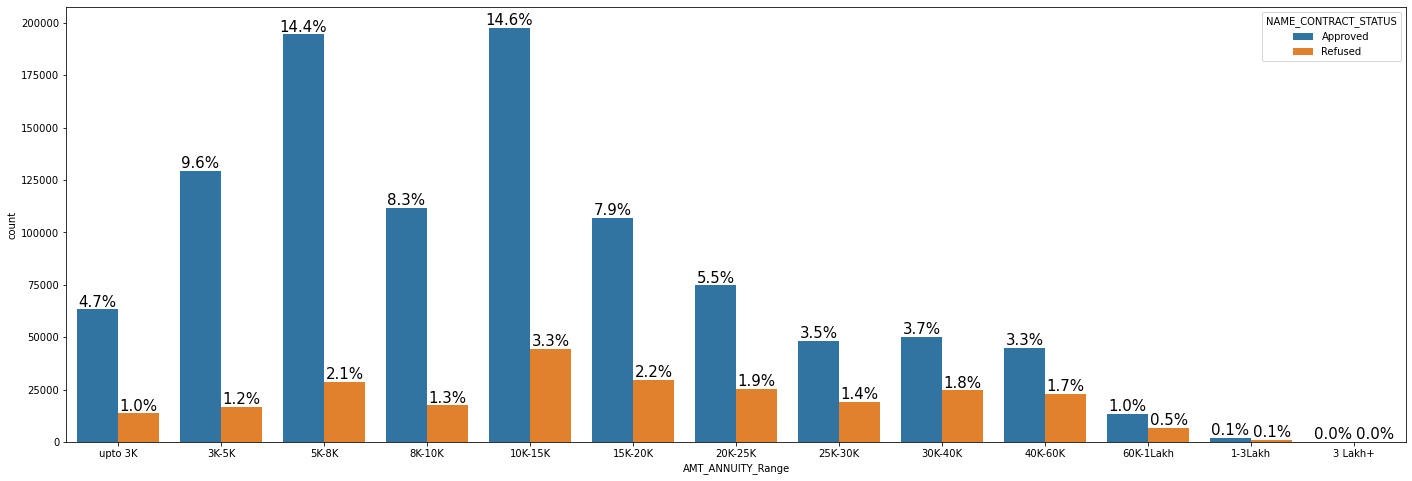

In [145]:
Plot_BarGraph_Prev( df1['AMT_ANNUITY_Range'], 24, 8)

In [146]:
# As we can see there is high probablity of loan defaulters for annuity(EMI) for range of 5K to 60K with highest for 
# 10K to 15K based on  the rejection % shown in the graph

In [147]:

print (pd.value_counts(df1["CNT_PAYMENT"], sort=True))

12.0    321982
6.0     190246
0.0     144512
10.0    141807
24.0    136382
18.0     76906
36.0     70516
60.0     50805
48.0     45568
8.0      30341
4.0      26923
30.0     16850
14.0      8250
42.0      7095
16.0      5699
5.0       3953
54.0      2085
20.0      1804
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       113
13.0        51
17.0        48
84.0        38
22.0        37
23.0        27
26.0        13
35.0        11
66.0         9
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
21.0         3
44.0         2
46.0         2
38.0         2
33.0         1
39.0         1
40.0         1
53.0         1
45.0         1
Name: CNT_PAYMENT, dtype: int64


In [148]:
#CNT_PAYMENT -Term of previous credit at application of the previous application

#print (pd.value_counts(df1["CNT_PAYMENT"], sort=True))

bins = [0, 1, 2, 3, 5, 8, 10, 15, 20, 40, 60, 80, 100, np.inf]
labels = [ 'upto 1', '1-2', '2-3', '3-5', '5-8', '8-10', '10-15', '15-20', '20-40', '40-60','60-80', '80-100', '100+']
df1['CNT_PAYMENT_Range'] = pd.cut(df1['CNT_PAYMENT'], bins, labels=labels)

print (pd.value_counts(df1["CNT_PAYMENT_Range"], sort=True))

10-15     331856
20-40     223870
5-8       222021
8-10      143043
40-60     105569
15-20      84463
3-5        30876
2-3         1100
60-80        122
80-100        38
upto 1         0
1-2            0
100+           0
Name: CNT_PAYMENT_Range, dtype: int64


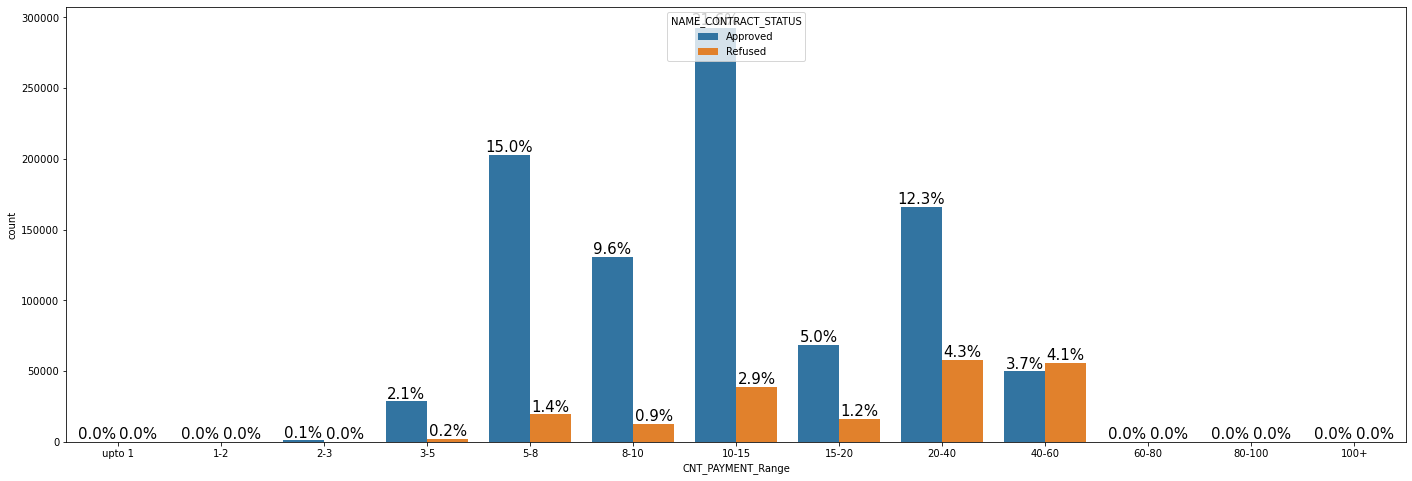

In [149]:
Plot_BarGraph_Prev( df1['CNT_PAYMENT_Range'], 24, 12)

In [150]:
# As we can see there is high probablity of loan defaulters for Term of previous credit for 10-15, 20-40 and 40-60 compared to 
# other Payment range based on  the rejection % shown in the graph

#  HeatMap  - Bivariate Analysis

# 

### Prepare data for HeatMap based on the Column which has good probability to identify Loan Defaulters and then create 2 different 

#### Dataframes for Approved Loan and Rejected Loans

In [151]:


MergedData_col2 = ['NAME_PRODUCT_TYPE'  , 'CHANNEL_TYPE' , 'NAME_YIELD_GROUP' , 
                  'NAME_SELLER_INDUSTRY' , 'NAME_PORTFOLIO' , 'NAME_CLIENT_TYPE' , 'CODE_REJECT_REASON' , 'NFLAG_LAST_APPL_IN_DAY' ,
                  'NAME_CONTRACT_TYPE' , 'NAME_PAYMENT_TYPE' , 'ApprovedLoanReduced%' , 'AMT_GOODS_PRICE' , 'AMT_ANNUITY' ,
                  'CNT_PAYMENT']
print(MergedData_col2)



['NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'NAME_SELLER_INDUSTRY', 'NAME_PORTFOLIO', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_TYPE', 'NAME_PAYMENT_TYPE', 'ApprovedLoanReduced%', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT']


In [152]:
df_Defaulter = df1.loc[df1['NAME_CONTRACT_STATUS'] == 'Refused']
df_NonDefaulter = df1.loc[df1['NAME_CONTRACT_STATUS'] == 'Approved']

In [153]:
LoanApproved_df1 = df_NonDefaulter.filter(MergedData_col2, axis=1)
LoanRejected_df1 = df_Defaulter.filter(MergedData_col2, axis=1)

In [154]:
LoanApproved_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063217 entries, 0 to 1670213
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NAME_PRODUCT_TYPE       1063217 non-null  object 
 1   CHANNEL_TYPE            1063217 non-null  object 
 2   NAME_YIELD_GROUP        1063217 non-null  object 
 3   NAME_SELLER_INDUSTRY    1063217 non-null  object 
 4   NAME_PORTFOLIO          1063217 non-null  object 
 5   NAME_CLIENT_TYPE        1063217 non-null  object 
 6   CODE_REJECT_REASON      1063217 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY  1063217 non-null  int64  
 8   NAME_CONTRACT_TYPE      1063217 non-null  object 
 9   NAME_PAYMENT_TYPE       1063217 non-null  object 
 10  ApprovedLoanReduced%    1061173 non-null  float64
 11  AMT_GOODS_PRICE         1020377 non-null  float64
 12  AMT_ANNUITY             1037685 non-null  float64
 13  CNT_PAYMENT             1037689 non-null  float64
dtypes:

In [155]:
LoanRejected_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290678 entries, 4 to 1670207
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME_PRODUCT_TYPE       290678 non-null  object 
 1   CHANNEL_TYPE            290678 non-null  object 
 2   NAME_YIELD_GROUP        290678 non-null  object 
 3   NAME_SELLER_INDUSTRY    290678 non-null  object 
 4   NAME_PORTFOLIO          290678 non-null  object 
 5   NAME_CLIENT_TYPE        290678 non-null  object 
 6   CODE_REJECT_REASON      290678 non-null  object 
 7   NFLAG_LAST_APPL_IN_DAY  290678 non-null  int64  
 8   NAME_CONTRACT_TYPE      290678 non-null  object 
 9   NAME_PAYMENT_TYPE       290678 non-null  object 
 10  ApprovedLoanReduced%    261520 non-null  float64
 11  AMT_GOODS_PRICE         253573 non-null  float64
 12  AMT_ANNUITY             249780 non-null  float64
 13  CNT_PAYMENT             249781 non-null  float64
dtypes: float64(4), int6

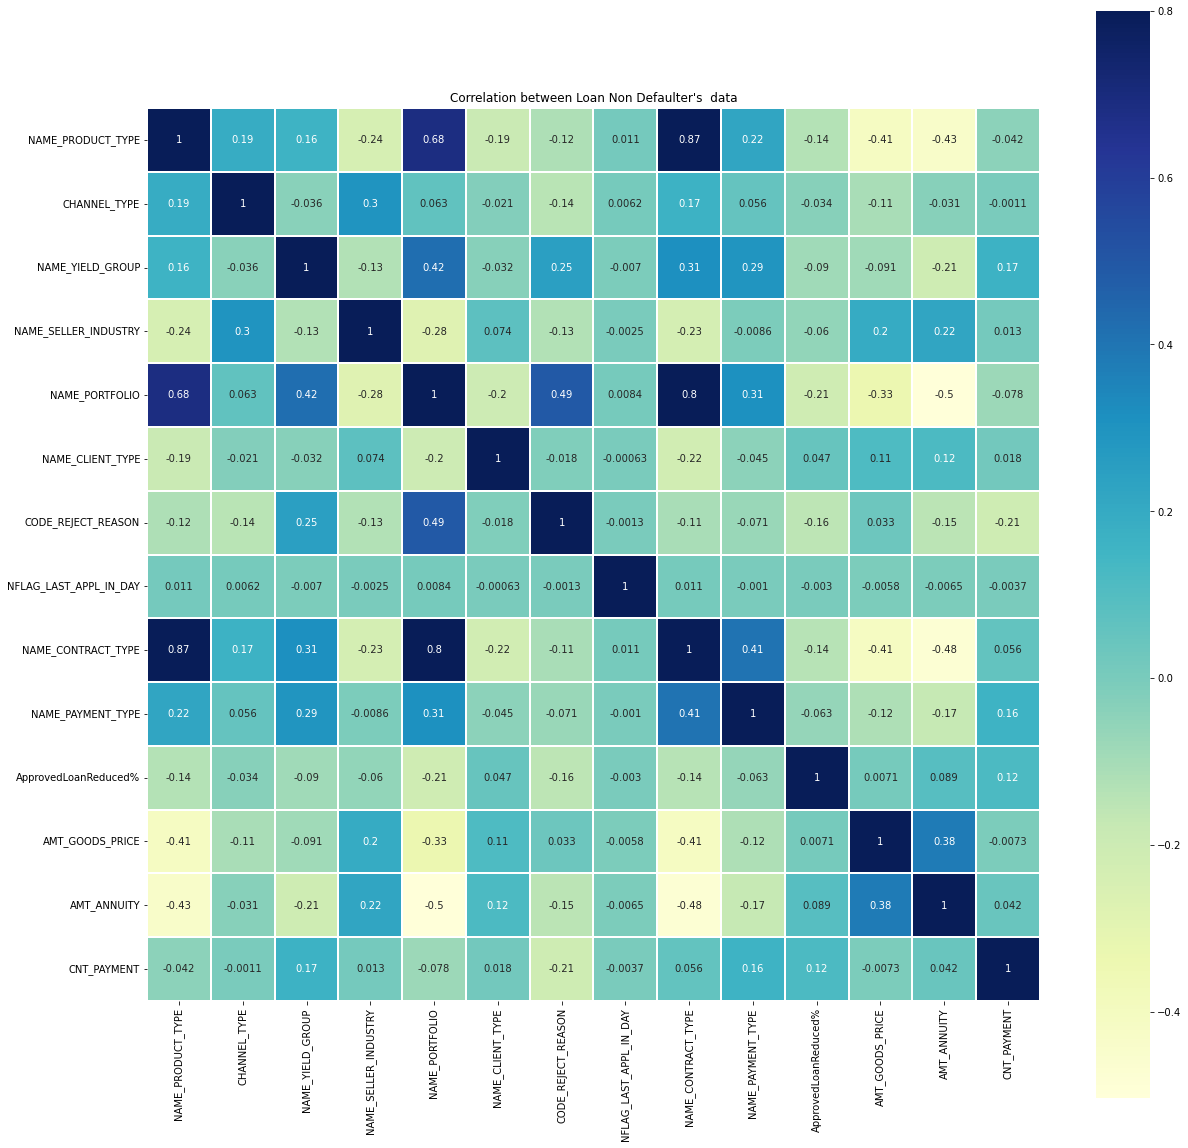

In [156]:
plt.figure(figsize=(20, 20))

sns.heatmap(LoanApproved_df1.apply(lambda x: x.factorize()[0]).corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title("Correlation between Loan Non Defaulter's  data");

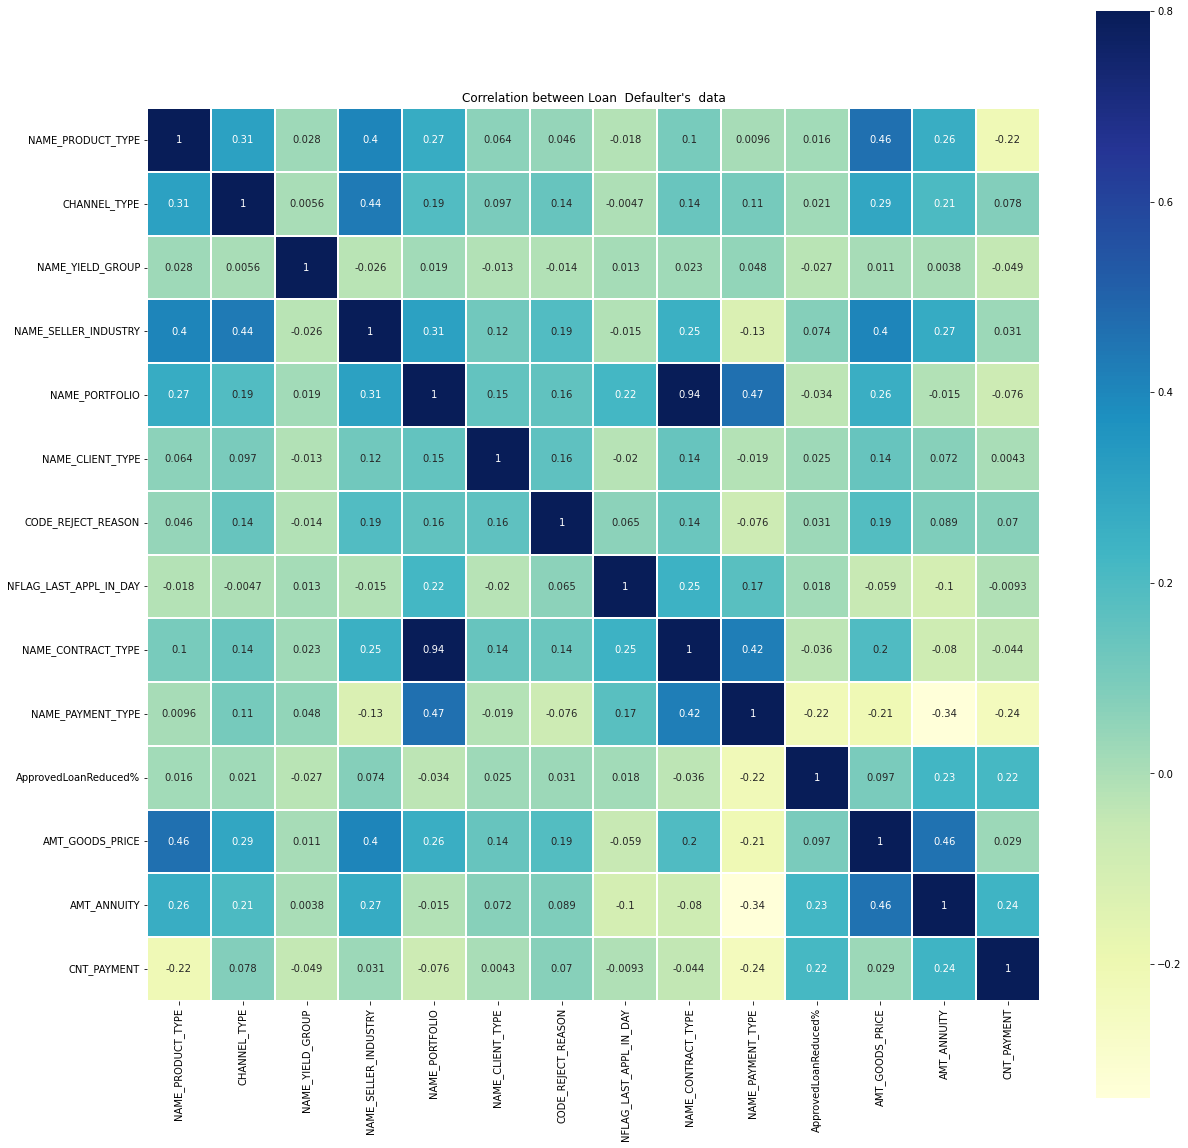

In [157]:
plt.figure(figsize=(20, 20))

sns.heatmap(LoanRejected_df1.apply(lambda x: x.factorize()[0]).corr(), vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title("Correlation between Loan  Defaulter's  data");

# Based on Heatmap, we can identify the Correlated Variables for previous_application.csv

### 1. Name_Product_Type and Amt_Goods_Price
### 2. Name_Product_Type and Name_Seller_Industry
### 3. Name_Portfolio and Name_Payment_Type